# <a id="phân-tích-dữ-liệu-doanh-số-bán-game-toàn-cầu"></a>Phân Tích Dữ Liệu Doanh Số Bán Game Toàn Cầu

**Link dataset:** https://www.kaggle.com/datasets/gregorut/videogamesales

# <a id="notebook-1-thu-thập-dữ-liệu-tiền-xử-lý-khám-phá-dữ-liệu-eda"></a>Notebook 1: Thu thập Dữ liệu, Tiền xử lý & Khám phá Dữ liệu (EDA)

## <a id="mục-lục"></a>Mục lục

- [Import các thư viện cần thiết](#import-các-thư-viện-cần-thiết)
- [1. Thu thập Dữ liệu](#1-thu-thập-dữ-liệu)
- [2. Khám phá dữ liệu](#2-khám-phá-dữ-liệu)
  - [Mô tả dataset](#mô-tả-dataset)
  - [Kiểm tra dữ liệu thiếu](#kiểm-tra-dữ-liệu-thiếu)
  - [Phân tích khám phá dữ liệu (EDA) chi tiết](#phân-tích-khám-phá-dữ-liệu-eda-chi-tiết)
- [Tổng kết phần Khám phá Dữ liệu](#tổng-kết-phần-khám-phá-dữ-liệu)

## <a id="import-các-thư-viện-cần-thiết"></a>Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style cho seaborn
sns.set_theme(style='whitegrid')

# Thiết lập hiển thị đầy đủ các cột
pd.set_option('display.max_columns', None)

# Thiết lập kích thước mặc định cho các biểu đồ
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

# Thiết lập font hỗ trợ tiếng Việt (nếu cần)
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

import warnings
warnings.filterwarnings('ignore')

## <a id="1-thu-thập-dữ-liệu"></a>1. Thu thập Dữ liệu

### <a id="dữ-liệu-về-chủ-đề-gì"></a>Dữ liệu về chủ đề gì?

Dataset được sử dụng trong đồ án này liên quan đến **doanh số bán video game trên toàn cầu**.
Mỗi dòng trong dataset đại diện cho một trò chơi điện tử cụ thể, kèm theo các thông tin mô tả
quan trọng như nền tảng phát hành (platform), năm phát hành, thể loại (genre), nhà phát hành
(publisher), nhà phát triển (developer) và doanh số bán ra tại các khu vực khác nhau trên thế giới
(Bắc Mỹ, Châu Âu, Nhật Bản và các khu vực khác).

Dataset phản ánh **bức tranh tổng quan của thị trường game toàn cầu**, cho phép phân tích xu hướng
theo thời gian, sự khác biệt giữa các khu vực địa lý, cũng như mối quan hệ giữa đặc điểm của trò chơi
và mức độ thành công về mặt thương mại.

### <a id="lý-do-chọn-dataset"></a>Lý do chọn dataset:

Nhóm lựa chọn dataset này vì một số lý do chính sau:

- Thứ nhất, video game là một ngành công nghiệp giải trí có quy mô lớn và phát triển nhanh. Việc phân tích dữ liệu doanh số game mang lại nhiều giá trị thực tiễn cho các nhà phát hành, nhà phát triển và nghiên cứu thị trường.

- Thứ hai, dataset có kích thước đủ lớn (hơn 16,000 bản ghi) và bao gồm nhiều biến định tính và định lượng, phù hợp để khám phá dữ liệu.

- Cuối cùng, dataset này không quá sạch, vẫn tồn tại giá trị thiếu và sự mất cân bằng dữ liệu. Điều này giúp nhóm có cơ hội thực hành các bước tiền xử lý và phân tích dữ liệu theo chuẩn quy trình khoa học dữ liệu.

### <a id="nguồn-dữ-liệu-và-quyền-sử-dụng"></a>Nguồn dữ liệu và quyền sử dụng

Dữ liệu được sử dụng trong đồ án này lấy từ trang chia sẻ dataset học thuật **Kaggle** tại địa chỉ:
https://www.kaggle.com/datasets/gregorut/videogamesales. Đây là một *dataset mở* đăng tải bởi người dùng Kaggle với mục đích học tập và nghiên cứu phân tích dữ liệu.


Do Kaggle không cung cấp **license bản quyền cụ thể trong trang dataset**, quyền sử dụng bản dữ liệu này tuân theo các điều khoản chung của Kaggle: được phép tải về và sử dụng cho mục đích **phân tích dữ liệu, học tập và nghiên cứu**, miễn là không vi phạm chính sách sử dụng của Kaggle và các quy định bản quyền nội dung gốc từ VGChartz. Khi sử dụng dataset trong báo cáo hoặc sản phẩm học thuật, cần *ghi rõ nguồn dữ liệu* để đảm bảo tính minh bạch và tôn trọng quyền sở hữu trí tuệ.

Dữ liệu có thể được tải trực tiếp từ Kaggle sau khi đăng nhập tài khoản, và việc sử dụng dataset này trong đồ án là hoàn toàn phù hợp với mục đích học thuật.

### <a id="tác-giả-đã-thu-thập-dữ-liệu-như-thế-nào"></a>Tác giả đã thu thập dữ liệu như thế nào?

Dataset được thu thập thông qua **kỹ thuật web scrapping** từ trang web thống kê doanh số video game **VGChartz**. Tác giả đã xây dựng một script bằng Python sử dụng thư viện **BeautifulSoup**.

Cụ thế, Script duyệt qua nhiều danh sách trò chơi trên VGChartz, thu thập thông tin cơ bản của từng game như tên trò chơi, nền tảng phát hành, nhà phát hành, doanh số theo khu vực và năm phát hành. Ngoài ra, script còn truy cập vào trang chi tiết của từng trò chơi để lấy thêm thông tin về thể loại, do cấu trúc trang web không đồng nhất giữa các game.

Theo mô tả của tác giả, ban đầu có tổng cộng **16,598 bản ghi** được thu thập. Tuy nhiên, **2 bản ghi đã bị loại bỏ** do thiếu thông tin quan trọng, dẫn đến dataset cuối cùng gồm **16,596** bản ghi hợp lệ.

Toàn bộ mã nguồn phục vụ cho quá trình thu thập dữ liệu được công khai trên Github: https://github.com/GregorUT/vgchartzScrape

## <a id="2-khám-phá-dữ-liệu"></a>2. Khám phá dữ liệu

### <a id="đọc-dữ-liệu-từ-file-csv"></a>Đọc dữ liệu từ file CSV

In [2]:
# Đọc dữ liệu
df = pd.read_csv('../data/vgsales.csv')

# Hiển thị 10 dòng đầu tiên
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### <a id="mô-tả-dataset"></a>Mô tả dataset

Dataset này chứa thông tin về doanh số bán game trên toàn cầu với hơn 16,000 game được phát hành từ những năm 1980 đến 2020. Dữ liệu được thu thập từ VGChartz, một trang web theo dõi doanh số bán game.

**Các thuộc tính trong dataset:**
- **Rank:** Thứ hạng dựa trên doanh số toàn cầu
- **Name:** Tên game
- **Platform:** Nền tảng phát hành (ví dụ: PS4, Xbox One, PC)
- **Year:** Năm phát hành
- **Genre:** Thể loại game (Action, Sports, RPG, ...)
- **Publisher:** Nhà phát hành
- **NA_Sales:** Doanh số tại Bắc Mỹ (triệu đô)
- **EU_Sales:** Doanh số tại Châu Âu (triệu đô)
- **JP_Sales:** Doanh số tại Nhật Bản (triệu đô)
- **Other_Sales:** Doanh số tại các khu vực khác (triệu đô)
- **Global_Sales:** Tổng doanh số toàn cầu (triệu đô)

### <a id="thông-tin-cơ-bản-về-dataset"></a>Thông tin cơ bản về dataset

- Dữ liệu có bao nhiêu dòng và bao nhiêu cột?
- Kiểu dữ liệu của từng cột? Các kiểu dữ liệu này có phù hợp với ý nghĩa của từng cột không?
- Thống kê mô tả cho các cột kiểu numeric?

In [3]:
print("=" * 60)
print("THÔNG TIN CƠ BẢN VỀ DATASET")
print("=" * 60)
print(f"Số lượng records: {len(df):,}")
print(f"Số lượng cột: {len(df.columns)}")
print("\nCác cột trong dataset:")
print(df.columns.tolist())
print("\n" + "=" * 60)

# Thông tin chi tiết về kiểu dữ liệu
df.info()

THÔNG TIN CƠ BẢN VỀ DATASET
Số lượng records: 16,598
Số lượng cột: 11

Các cột trong dataset:
['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Nhận xét:** Không có cột nào có kiểu dữ liệu không phù hợp

In [4]:
# Thống kê mô tả cho các cột số
print("THỐNG KÊ MÔ TẢ CHO CÁC CỘT SỐ")
print("=" * 80)
df.describe().round(2)

THỐNG KÊ MÔ TẢ CHO CÁC CỘT SỐ


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.00,16327.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,8300.61,2006.41,0.26,0.15,0.08,0.05,0.54
std,4791.85,5.83,0.82,0.51,0.31,0.19,1.56
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4151.25,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8300.50,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12449.75,2010.00,0.24,0.11,0.04,0.04,0.47
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


### <a id="kiểm-tra-dữ-liệu-thiếu"></a>Kiểm tra dữ liệu thiếu

DỮ LIỆU THIẾU TRONG DATASET
           Số lượng thiếu  Tỷ lệ (%)
Year                  271       1.63
Publisher              58       0.35


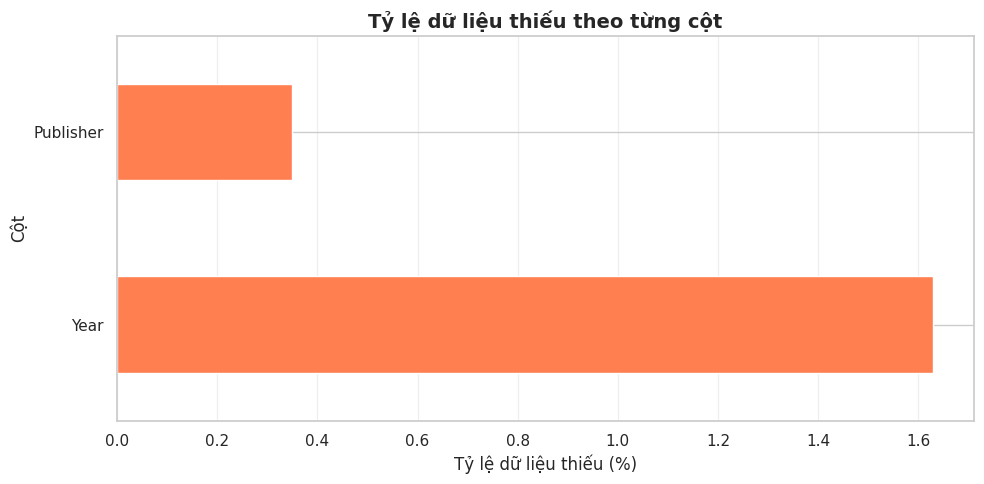

In [5]:
# Kiểm tra dữ liệu thiếu
missing_data = pd.DataFrame({
    'Số lượng thiếu': df.isnull().sum(),
    'Tỷ lệ (%)': (df.isnull().sum() / len(df) * 100).round(2)
})

missing_data = missing_data[missing_data['Số lượng thiếu'] > 0].sort_values('Số lượng thiếu', ascending=False)

print("DỮ LIỆU THIẾU TRONG DATASET")
print("=" * 50)
if len(missing_data) > 0:
    print(missing_data)
else:
    print("Không có dữ liệu thiếu!")

# Trực quan hóa dữ liệu thiếu
if len(missing_data) > 0:
    plt.figure(figsize=(10, 5))
    missing_data['Tỷ lệ (%)'].plot(kind='barh', color='coral')
    plt.xlabel('Tỷ lệ dữ liệu thiếu (%)', fontsize=12)
    plt.ylabel('Cột', fontsize=12)
    plt.title('Tỷ lệ dữ liệu thiếu theo từng cột', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Không cần vẽ biểu đồ vì không có dữ liệu thiếu")

Dữ liệu khá sạch với tỷ lệ thiếu (missing value) ở cột Year và Publisher rất thấp (dưới 2%).

Điều này khẳng định độ tin cậy của bộ dữ liệu và cho phép chúng ta tự tin loại bỏ các dòng thiếu này (như đã làm ở bước tiền xử lý) mà không sợ làm sai lệch phân phối tổng thể của các mẫu.

### Kiểm tra dữ liệu trùng lặp

In [6]:
# Kiểm tra bản ghi trùng lặp hoàn toàn
duplicate_count = df.duplicated().sum()
print(f"Số lượng bản ghi trùng lặp hoàn toàn: {duplicate_count}")

# Kiểm tra game trùng tên
duplicate_names = df['Name'].duplicated().sum()
print(f"Số lượng game có tên trùng nhau: {duplicate_names}")

# Hiển thị một vài ví dụ về game trùng tên
if duplicate_names > 0:
    print("\nVí dụ về các game có tên trùng nhau (cùng tên nhưng khác platform/năm):")
    duplicate_game_names = df[df['Name'].duplicated(keep=False)]['Name'].unique()[:5]
    for game_name in duplicate_game_names:
        print(f"\n{game_name}:")
        print(df[df['Name'] == game_name][['Name', 'Platform', 'Year', 'Genre']].head())

Số lượng bản ghi trùng lặp hoàn toàn: 0
Số lượng game có tên trùng nhau: 5105

Ví dụ về các game có tên trùng nhau (cùng tên nhưng khác platform/năm):

Super Mario Bros.:
                  Name Platform    Year     Genre
1    Super Mario Bros.      NES  1985.0  Platform
200  Super Mario Bros.       GB  1999.0  Platform

Tetris:
       Name Platform    Year   Genre
5    Tetris       GB  1989.0  Puzzle
155  Tetris      NES  1988.0  Puzzle

Grand Theft Auto V:
                    Name Platform    Year   Genre
16    Grand Theft Auto V      PS3  2013.0  Action
23    Grand Theft Auto V     X360  2013.0  Action
44    Grand Theft Auto V      PS4  2014.0  Action
197   Grand Theft Auto V     XOne  2014.0  Action
1896  Grand Theft Auto V       PC  2015.0  Action

Grand Theft Auto: San Andreas:
                               Name Platform    Year   Genre
17    Grand Theft Auto: San Andreas      PS2  2004.0  Action
873   Grand Theft Auto: San Andreas       XB  2005.0  Action
2120  Grand Theft Auto:

### <a id="phân-tích-khám-phá-dữ-liệu-eda-chi-tiết"></a>Phân tích khám phá dữ liệu (EDA) chi tiết

#### <a id="1-phân-tích-theo-nền-tảng-platform"></a>1. Phân tích theo nền tảng (Platform)

SỐ LƯỢNG GAME THEO NỀN TẢNG (TOP 15)
Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
Name: count, dtype: int64


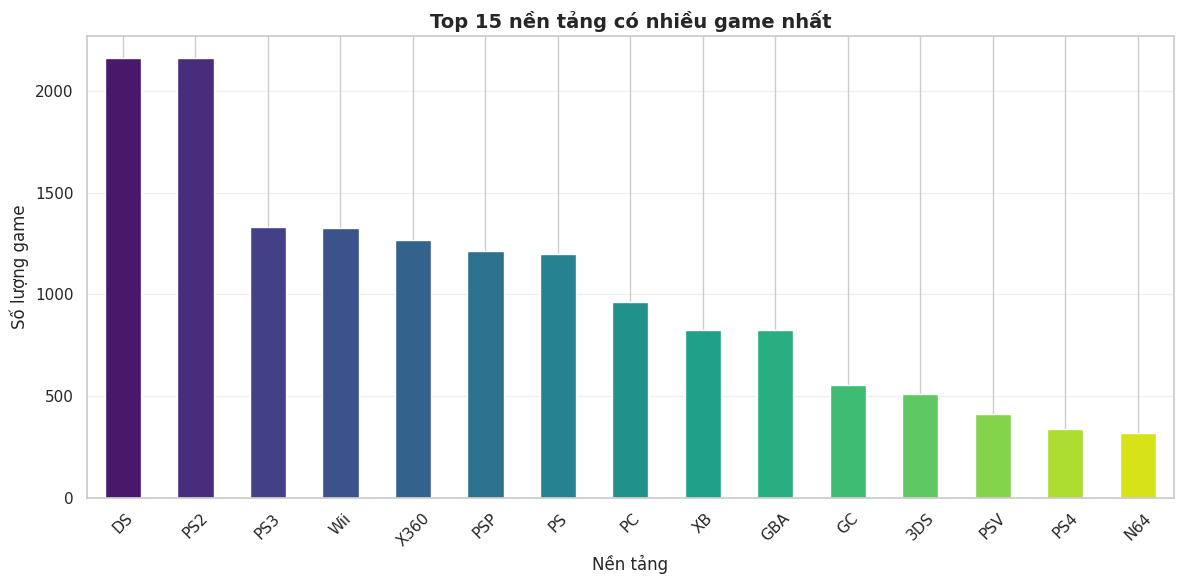

In [7]:
# Thống kê số lượng game theo platform
platform_counts = df['Platform'].value_counts()
print("SỐ LƯỢNG GAME THEO NỀN TẢNG (TOP 15)")
print("=" * 50)
print(platform_counts.head(15))

# Biểu đồ số lượng game theo platform (top 15)
plt.figure(figsize=(12, 6))
top_platforms = platform_counts.head(15)
colors = sns.color_palette('viridis', len(top_platforms))
top_platforms.plot(kind='bar', color=colors)
plt.title('Top 15 nền tảng có nhiều game nhất', fontsize=14, fontweight='bold')
plt.xlabel('Nền tảng', fontsize=12)
plt.ylabel('Số lượng game', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

DS và PS2 dẫn đầu về số lượng đầu game phát hành, cho thấy đây là hai hệ máy có thư viện game đồ sộ nhất lịch sử, thu hút rất nhiều nhà phát triển bên thứ ba.

Các hệ máy hiện đại hơn (như PS4, XOne) có số lượng ít hơn do chi phí sản xuất game ngày càng tăng cao, khiến số lượng game ra mắt hàng năm giảm đi so với thời kỳ 2000-2010.


DOANH SỐ TOÀN CẦU THEO NỀN TẢNG (TOP 15) - Triệu USD
Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
Name: Global_Sales, dtype: float64


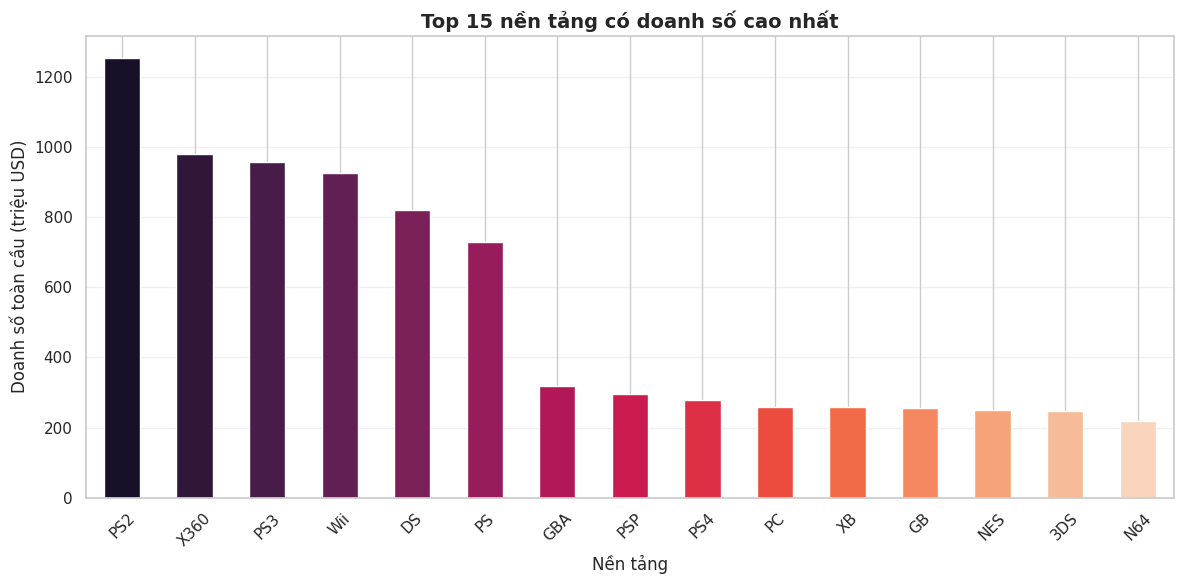

In [8]:
# Doanh số theo platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
print("\nDOANH SỐ TOÀN CẦU THEO NỀN TẢNG (TOP 15) - Triệu USD")
print("=" * 60)
print(platform_sales.head(15).round(2))

# Biểu đồ doanh số theo platform
plt.figure(figsize=(12, 6))
top_platform_sales = platform_sales.head(15)
colors = sns.color_palette('rocket', len(top_platform_sales))
top_platform_sales.plot(kind='bar', color=colors)
plt.title('Top 15 nền tảng có doanh số cao nhất', fontsize=14, fontweight='bold')
plt.xlabel('Nền tảng', fontsize=12)
plt.ylabel('Doanh số toàn cầu (triệu USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Mặc dù Nintendo DS có số lượng game nhiều nhất, nhưng PS2 mới là "nhà vua" về tổng doanh thu toàn cầu.

X360 là một trường hợp thú vị: Dù số lượng game ít hơn DS và PS2, nhưng doanh thu lại nằm trong top đầu, chứng tỏ hiệu suất bán hàng (sales per game) của X360 rất cao nhờ vào tập khách hàng phổ thông (casual gamers).

#### 2. Phân tích theo thể loại (Genre)

SỐ LƯỢNG GAME THEO THỂ LOẠI
Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64


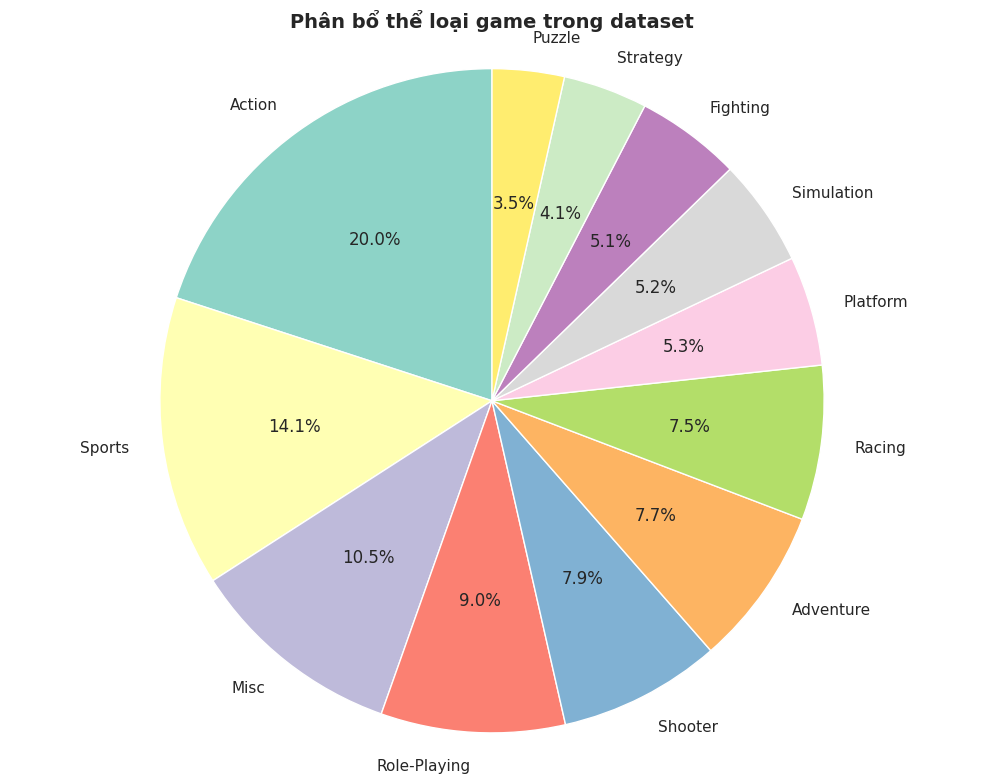

In [9]:
# Thống kê số lượng game theo genre
genre_counts = df['Genre'].value_counts()
print("SỐ LƯỢNG GAME THEO THỂ LOẠI")
print("=" * 50)
print(genre_counts)

# Biểu đồ tròn - phân bổ thể loại game
plt.figure(figsize=(10, 8))
colors = sns.color_palette('Set3', len(genre_counts))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors)
plt.title('Phân bổ thể loại game trong dataset', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

Nhận xét:
Thị trường bị chi phối bởi hai thể loại chính: Action (Hành động) và Sports (Thể thao). Điều này phản ánh nguồn cung từ các nhà phát triển đang tập trung vào các trải nghiệm kịch tính hoặc mô phỏng thi đấu.


DOANH SỐ TOÀN CẦU THEO THỂ LOẠI - Triệu USD
Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64


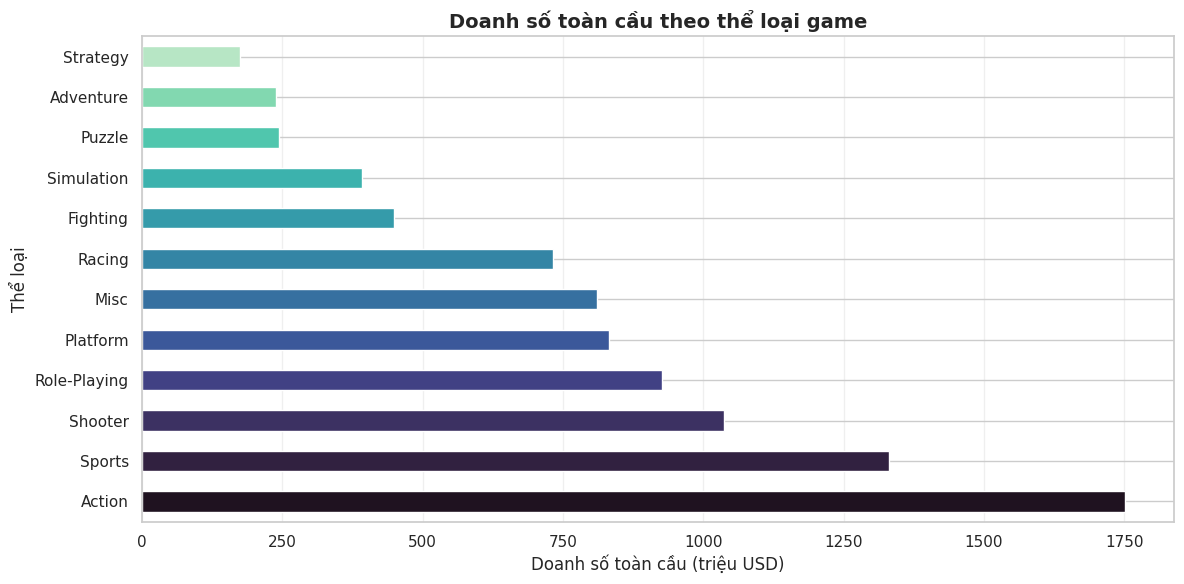

In [10]:
# Doanh số theo genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
print("\nDOANH SỐ TOÀN CẦU THEO THỂ LOẠI - Triệu USD")
print("=" * 50)
print(genre_sales.round(2))

# Biểu đồ doanh số theo genre
plt.figure(figsize=(12, 6))
colors = sns.color_palette('mako', len(genre_sales))
genre_sales.plot(kind='barh', color=colors)
plt.title('Doanh số toàn cầu theo thể loại game', fontsize=14, fontweight='bold')
plt.xlabel('Doanh số toàn cầu (triệu USD)', fontsize=12)
plt.ylabel('Thể loại', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Ý nghĩa:

Doanh số đi đôi với số lượng: Action vẫn là thể loại kiếm tiền số 1.

Tuy nhiên, hãy chú ý Shooter (Bắn súng): Dù số lượng game phát hành ít hơn Sports và Misc (ở biểu đồ trên), nhưng doanh thu lại đứng thứ 3. Điều này cho thấy "chất lượng" doanh thu của game bắn súng rất tốt.


DOANH SỐ TRUNG BÌNH MỖI GAME THEO THỂ LOẠI - Triệu USD
Genre
Platform        0.938
Shooter         0.792
Role-Playing    0.623
Racing          0.586
Sports          0.567
Fighting        0.529
Action          0.528
Misc            0.466
Simulation      0.452
Puzzle          0.421
Strategy        0.257
Adventure       0.186
Name: Global_Sales, dtype: float64


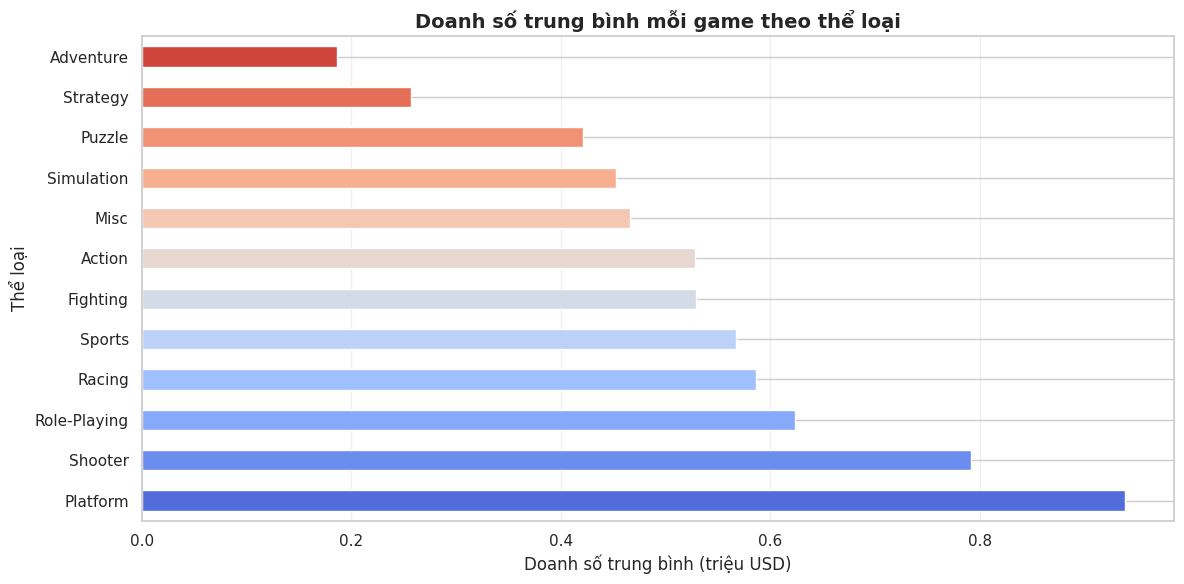

In [11]:
# Doanh số trung bình theo genre
genre_avg_sales = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
print("\nDOANH SỐ TRUNG BÌNH MỖI GAME THEO THỂ LOẠI - Triệu USD")
print("=" * 60)
print(genre_avg_sales.round(3))

plt.figure(figsize=(12, 6))
colors = sns.color_palette('coolwarm', len(genre_avg_sales))
genre_avg_sales.plot(kind='barh', color=colors)
plt.title('Doanh số trung bình mỗi game theo thể loại', fontsize=14, fontweight='bold')
plt.xlabel('Doanh số trung bình (triệu USD)', fontsize=12)
plt.ylabel('Thể loại', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Ý nghĩa (Insight quan trọng):

Đây là biểu đồ quan trọng nhất cho nhà đầu tư. Platform (Đi cảnh) và Shooter có doanh số trung bình cao nhất.

Nghĩa là: Làm một game Bắn súng hoặc Đi cảnh (như Mario) rủi ro sẽ thấp hơn và khả năng thành "hit" cao hơn so với làm game Adventure hay Strategy (doanh số trung bình rất thấp).

***Nhận xét:***

Phân tích về thể loại game cho thấy sự khác biệt rõ rệt giữa số lượng game được phát hành và doanh số thực tế. Một số thể loại có số lượng game lớn nhưng doanh số trung bình mỗi game lại thấp, trong khi một số thể loại khác tuy ít game hơn nhưng mỗi game lại tạo ra doanh số ấn tượng. Điều này phản ánh sự cạnh tranh và nhu cầu thị trường đối với từng loại game.

#### 3. Phân tích theo năm phát hành (Year)

Số lượng game không có thông tin năm: 271

Số lượng game có thông tin năm: 16327
Năm sớm nhất: 1980
Năm muộn nhất: 2020


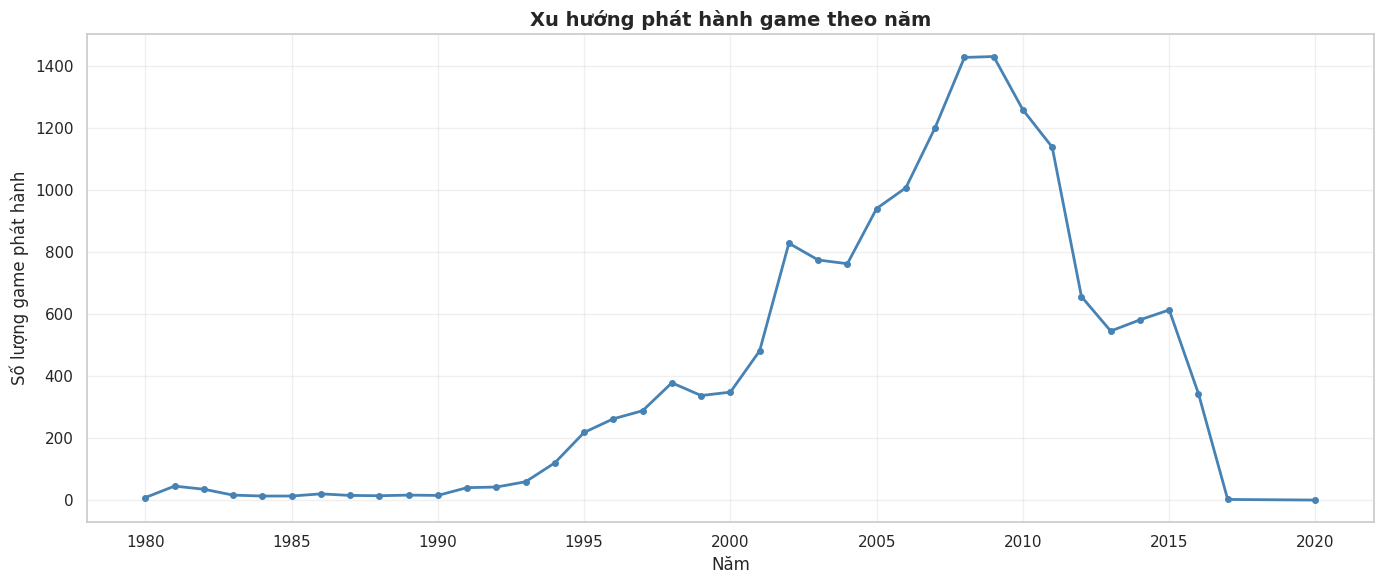

SỐ LƯỢNG GAME PHÁT HÀNH THEO NĂM (5 năm cao nhất)
Year
2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
dtype: int64


In [12]:
# Kiểm tra và xử lý giá trị thiếu trong cột Year
print(f"Số lượng game không có thông tin năm: {df['Year'].isna().sum()}")

# Tạo dataframe mới loại bỏ các giá trị thiếu trong Year để phân tích
df_year = df.dropna(subset=['Year']).copy()
df_year['Year'] = df_year['Year'].astype(int)

print(f"\nSố lượng game có thông tin năm: {len(df_year)}")
print(f"Năm sớm nhất: {df_year['Year'].min()}")
print(f"Năm muộn nhất: {df_year['Year'].max()}")

# Số lượng game phát hành theo năm
games_per_year = df_year.groupby('Year').size()

plt.figure(figsize=(14, 6))
plt.plot(games_per_year.index, games_per_year.values, marker='o',
         linewidth=2, markersize=4, color='steelblue')
plt.title('Xu hướng phát hành game theo năm', fontsize=14, fontweight='bold')
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Số lượng game phát hành', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("SỐ LƯỢNG GAME PHÁT HÀNH THEO NĂM (5 năm cao nhất)")
print("=" * 50)
print(games_per_year.sort_values(ascending=False).head())

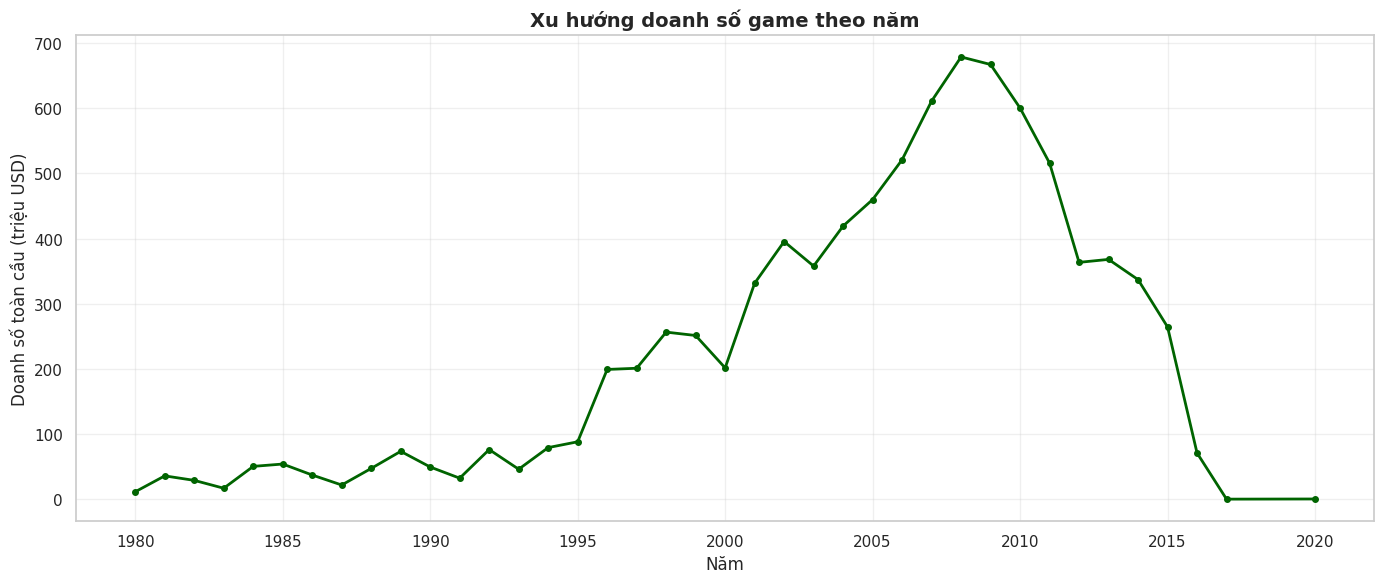


DOANH SỐ THEO NĂM (5 năm cao nhất) - Triệu USD
Year
2008    678.90
2009    667.30
2007    611.13
2010    600.45
2006    521.04
Name: Global_Sales, dtype: float64


In [13]:
# Doanh số theo năm
sales_per_year = df_year.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(14, 6))
plt.plot(sales_per_year.index, sales_per_year.values, marker='o',
         linewidth=2, markersize=4, color='darkgreen')
plt.title('Xu hướng doanh số game theo năm', fontsize=14, fontweight='bold')
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Doanh số toàn cầu (triệu USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nDOANH SỐ THEO NĂM (5 năm cao nhất) - Triệu USD")
print("=" * 50)
print(sales_per_year.sort_values(ascending=False).head().round(2))

Ý nghĩa:

Thời kỳ hoàng kim (2008-2009): Cả số lượng game và doanh thu đều đạt đỉnh vào giai đoạn này. Đây là thời điểm giao thoa giữa sự thống trị của Wii/DS và sự bùng nổ của PS3/Xbox360.

Sự sụt giảm sau 2012: Đồ thị đi xuống dốc không hẳn do ngành game chết, mà do dữ liệu trên VGChartz thiếu sót nhiều ở giai đoạn sau này, cộng với xu hướng chuyển dịch sang Digital Sales (không được thống kê đầy đủ trong dataset này).

#### 4. Phân tích theo thập kỷ (Decade)

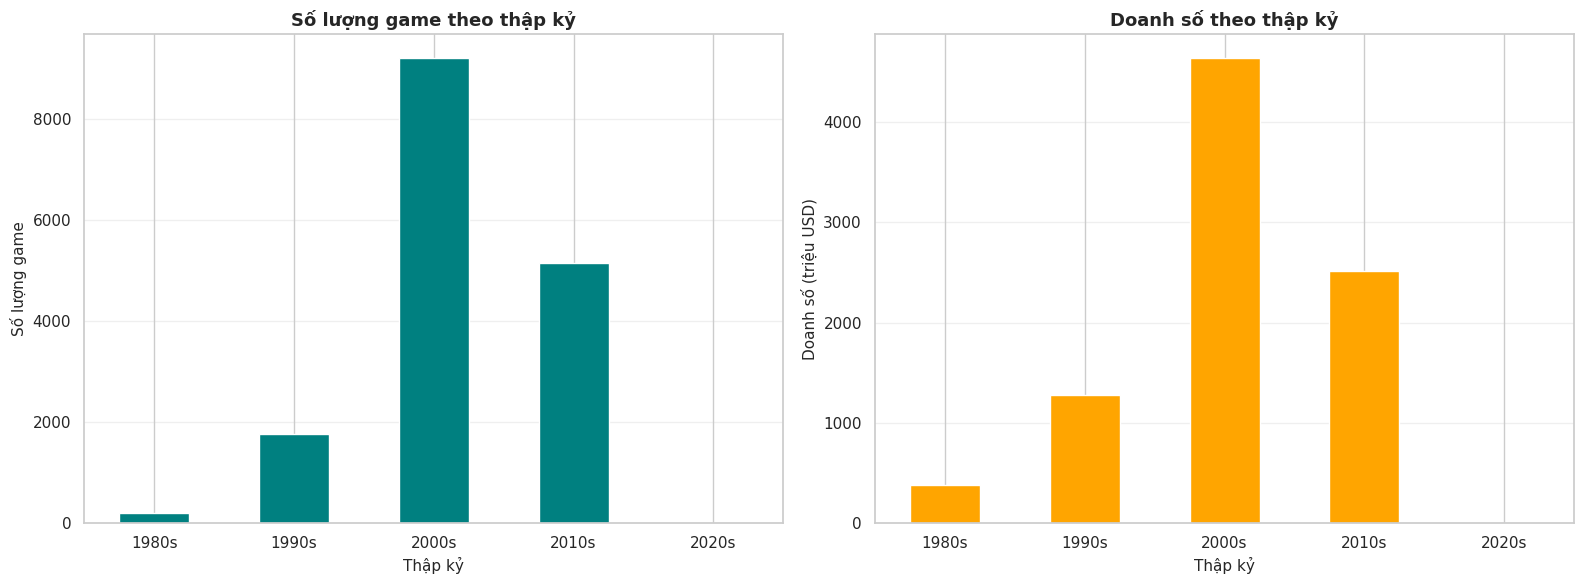

In [14]:
# Phân tích theo thập kỷ
df_year['Decade'] = (df_year['Year'] // 10) * 10
decade_sales = df_year.groupby('Decade')['Global_Sales'].sum()
decade_counts = df_year.groupby('Decade').size()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Số lượng game theo thập kỷ
decade_counts.plot(kind='bar', ax=ax1, color='teal')
ax1.set_title('Số lượng game theo thập kỷ', fontsize=13, fontweight='bold')
ax1.set_xlabel('Thập kỷ', fontsize=11)
ax1.set_ylabel('Số lượng game', fontsize=11)
ax1.grid(axis='y', alpha=0.3)
ax1.set_xticklabels([f"{int(x)}s" for x in decade_counts.index], rotation=0)

# Doanh số theo thập kỷ
decade_sales.plot(kind='bar', ax=ax2, color='orange')
ax2.set_title('Doanh số theo thập kỷ', fontsize=13, fontweight='bold')
ax2.set_xlabel('Thập kỷ', fontsize=11)
ax2.set_ylabel('Doanh số (triệu USD)', fontsize=11)
ax2.grid(axis='y', alpha=0.3)
ax2.set_xticklabels([f"{int(x)}s" for x in decade_sales.index], rotation=0)

plt.tight_layout()
plt.show()

***Nhận xét:***

Xu hướng phát hành game qua các năm cho thấy sự biến đổi rõ rệt của ngành công nghiệp game. Có thể thấy giai đoạn nào ngành game phát triển mạnh mẽ nhất, và giai đoạn nào có dấu hiệu suy giảm. Phân tích theo thập kỷ giúp ta thấy được bức tranh tổng quan về sự tiến hóa của ngành công nghiệp game từ những năm đầu cho đến hiện tại.

#### 5. Phân tích theo nhà phát hành (Publisher)

TOP 20 NHÀ PHÁT HÀNH CÓ NHIỀU GAME NHẤT
Publisher
Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Eidos Interactive                          198
Midway Games                               198
505 Games                                  192
Name: coun

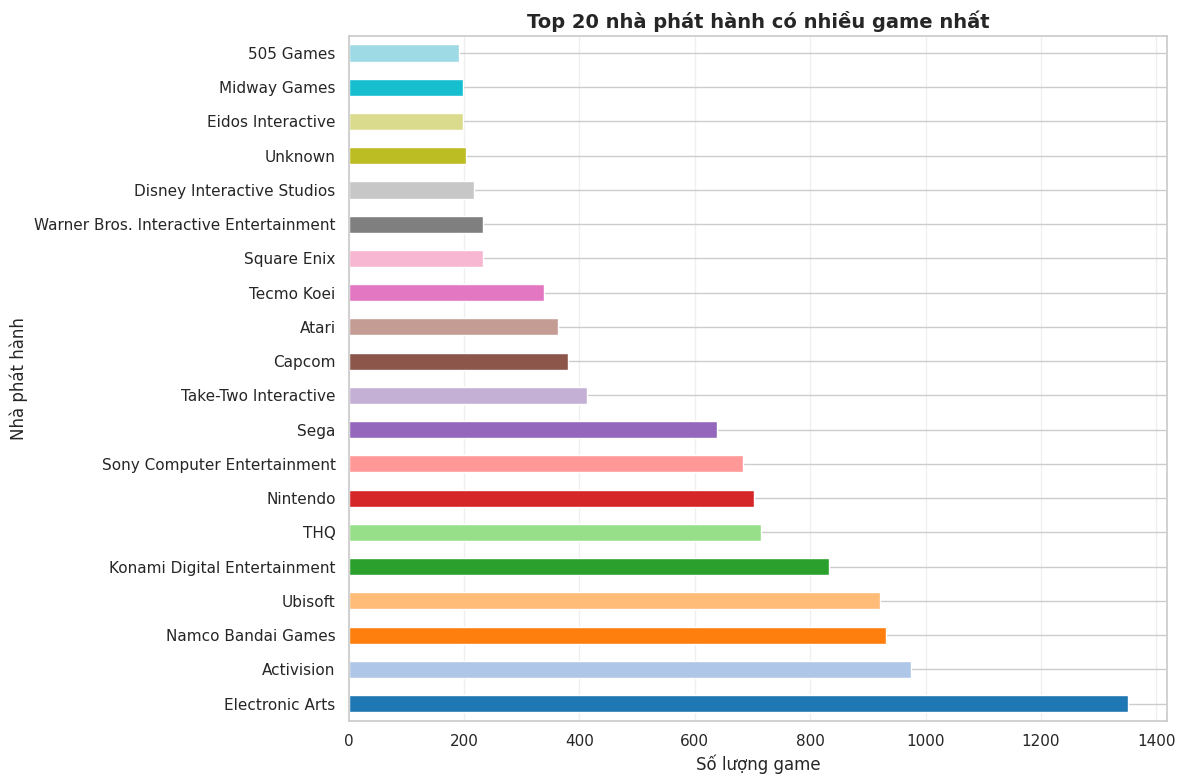

In [15]:
# Top publishers theo số lượng game
top_publishers_count = df['Publisher'].value_counts().head(20)
print("TOP 20 NHÀ PHÁT HÀNH CÓ NHIỀU GAME NHẤT")
print("=" * 50)
print(top_publishers_count)

# Biểu đồ top publishers theo số lượng
plt.figure(figsize=(12, 8))
colors = sns.color_palette('tab20', 20)
top_publishers_count.plot(kind='barh', color=colors)
plt.title('Top 20 nhà phát hành có nhiều game nhất', fontsize=14, fontweight='bold')
plt.xlabel('Số lượng game', fontsize=12)
plt.ylabel('Nhà phát hành', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


TOP 20 NHÀ PHÁT HÀNH CÓ DOANH SỐ CAO NHẤT - Triệu USD
Publisher
Nintendo                                  1786.56
Electronic Arts                           1110.32
Activision                                 727.46
Sony Computer Entertainment                607.50
Ubisoft                                    474.72
Take-Two Interactive                       399.54
THQ                                        340.77
Konami Digital Entertainment               283.64
Sega                                       272.99
Namco Bandai Games                         254.09
Microsoft Game Studios                     245.79
Capcom                                     200.89
Atari                                      157.22
Warner Bros. Interactive Entertainment     153.89
Square Enix                                145.18
Disney Interactive Studios                 119.96
Eidos Interactive                           98.98
LucasArts                                   87.34
Bethesda Softworks                 

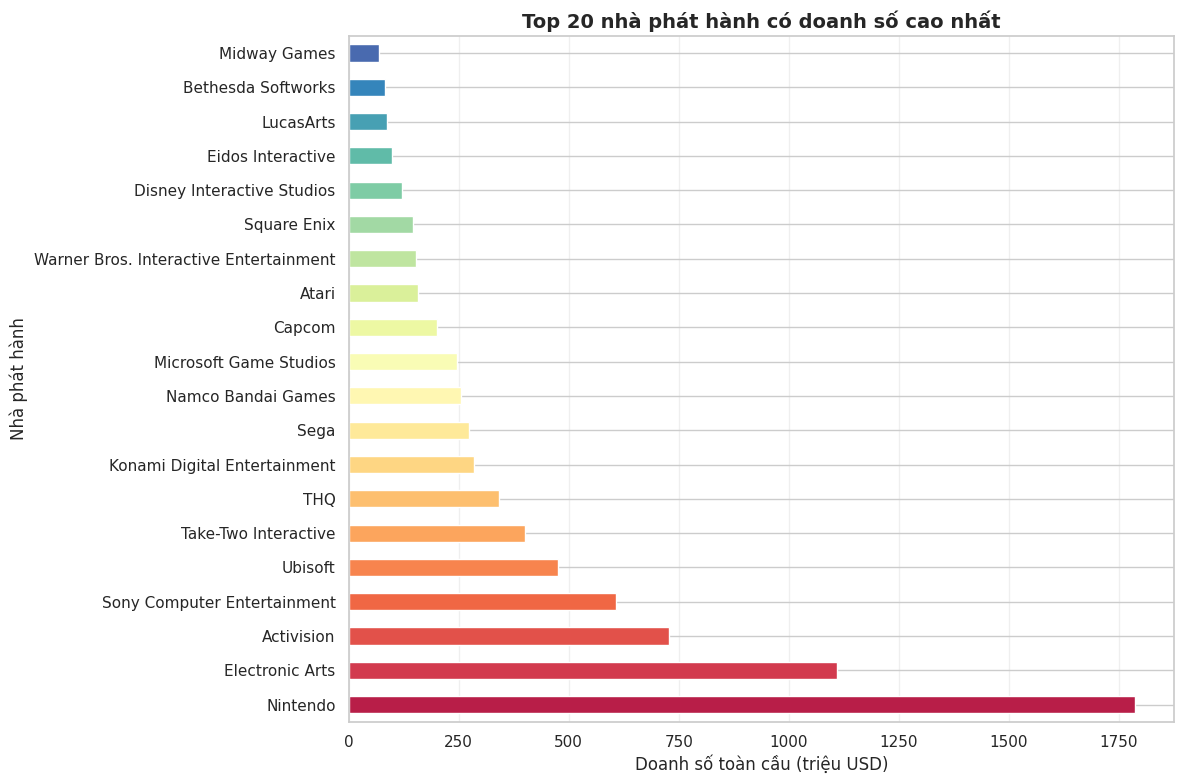

In [16]:
# Top publishers theo doanh số
top_publishers_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
print("\nTOP 20 NHÀ PHÁT HÀNH CÓ DOANH SỐ CAO NHẤT - Triệu USD")
print("=" * 60)
print(top_publishers_sales.round(2))

# Biểu đồ top publishers theo doanh số
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Spectral', 20)
top_publishers_sales.plot(kind='barh', color=colors)
plt.title('Top 20 nhà phát hành có doanh số cao nhất', fontsize=14, fontweight='bold')
plt.xlabel('Doanh số toàn cầu (triệu USD)', fontsize=12)
plt.ylabel('Nhà phát hành', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Electronic Arts (EA)** là "công xưởng" sản xuất game lớn nhất thế giới về mặt số lượng.

Tuy nhiên, **Nintendo** mới là bá chủ về doanh thu (mặc dù ra ít game hơn EA).

**Kết luận:** Nintendo đi theo chiến lược "Chất lượng hơn số lượng" với các tựa game độc quyền giá trị cao, trong khi EA đi theo chiến lược phủ sóng thị trường đa thể loại.

***Nhận xét:***

Phân tích về nhà phát hành cho thấy sự tập trung rõ rệt trong ngành công nghiệp game. Một số nhà phát hành lớn chiếm ưu thế cả về số lượng game lẫn doanh số, trong khi hàng trăm nhà phát hành nhỏ lẻ khác cạnh tranh trong phần còn lại của thị trường. Điều này phản ánh mô hình kinh doanh và năng lực cạnh tranh của các công ty trong ngành.

#### 6. Phân tích doanh số theo khu vực

TỔNG DOANH SỐ THEO KHU VỰC - Triệu USD
Bắc Mỹ              :    4392.95 (49.25%)
Châu Âu             :    2434.13 (27.29%)
Nhật Bản            :    1291.02 (14.47%)
Khu vực khác        :     797.75 ( 8.94%)
TỔNG                :    8920.44


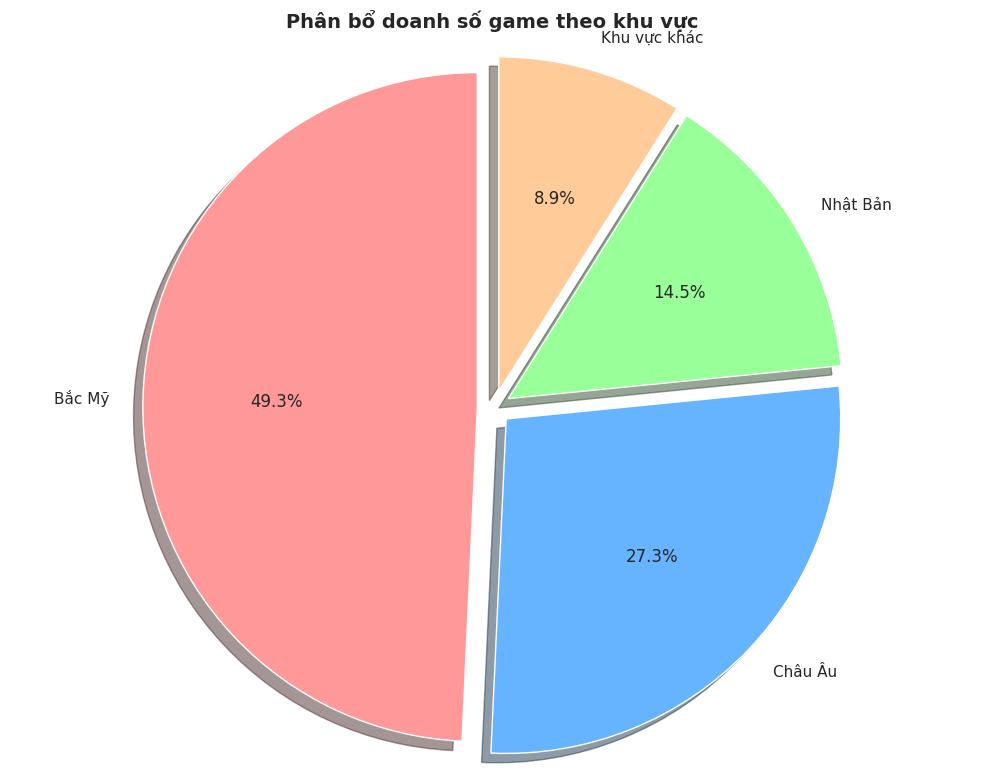

In [17]:
# Tổng doanh số theo từng khu vực
regional_sales = {
    'Bắc Mỹ': df['NA_Sales'].sum(),
    'Châu Âu': df['EU_Sales'].sum(),
    'Nhật Bản': df['JP_Sales'].sum(),
    'Khu vực khác': df['Other_Sales'].sum()
}

regional_sales_df = pd.Series(regional_sales).sort_values(ascending=False)

print("TỔNG DOANH SỐ THEO KHU VỰC - Triệu USD")
print("=" * 50)
for region, sales in regional_sales_df.items():
    percentage = (sales / df['Global_Sales'].sum()) * 100
    print(f"{region:20s}: {sales:10.2f} ({percentage:5.2f}%)")
print(f"{'TỔNG':20s}: {df['Global_Sales'].sum():10.2f}")

# Biểu đồ tròn - phân bổ doanh số theo khu vực
plt.figure(figsize=(10, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.05, 0.05, 0.05, 0.05)

plt.pie(regional_sales_df, labels=regional_sales_df.index, autopct='%1.1f%%',
        startangle=90, colors=colors, explode=explode, shadow=True)
plt.title('Phân bổ doanh số game theo khu vực', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

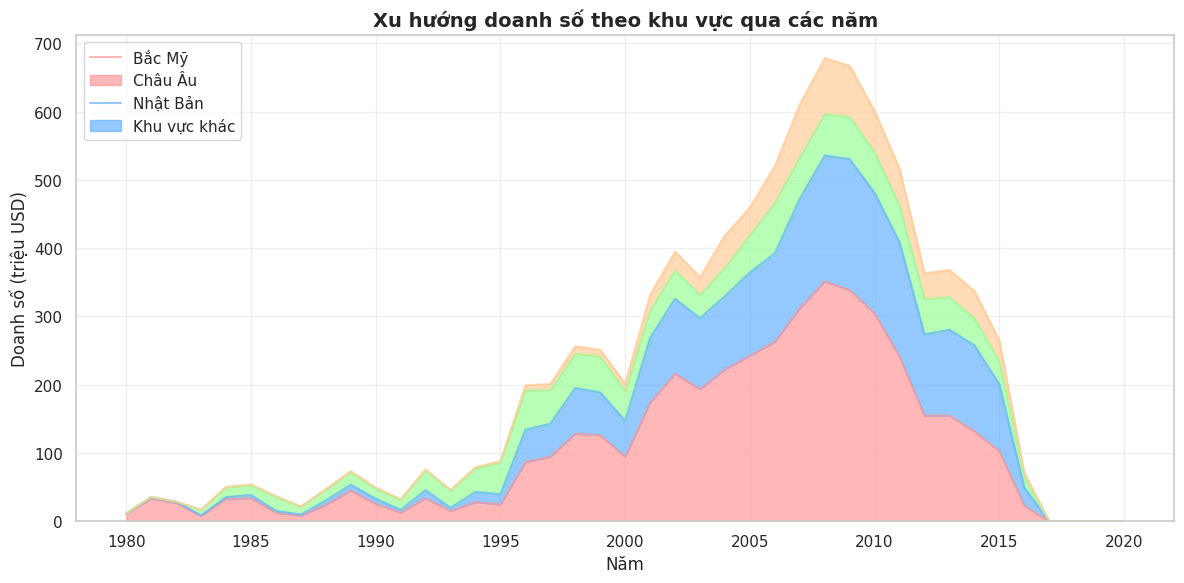

In [18]:
# So sánh doanh số các khu vực theo năm
if len(df_year) > 0:
    yearly_regional = df_year.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

    plt.figure(figsize=(14, 7))
    yearly_regional.plot(kind='area', stacked=True, alpha=0.7,
                         color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
    plt.title('Xu hướng doanh số theo khu vực qua các năm', fontsize=14, fontweight='bold')
    plt.xlabel('Năm', fontsize=12)
    plt.ylabel('Doanh số (triệu USD)', fontsize=12)
    plt.legend(['Bắc Mỹ', 'Châu Âu', 'Nhật Bản', 'Khu vực khác'], loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Bắc Mỹ (NA) chiếm gần 50% tổng doanh số toàn cầu, là thị trường quyết định sự sống còn của một tựa game bom tấn.

Châu Âu (EU) là thị trường lớn thứ 2, trong khi Nhật Bản (JP) chiếm khoảng 10-15%.

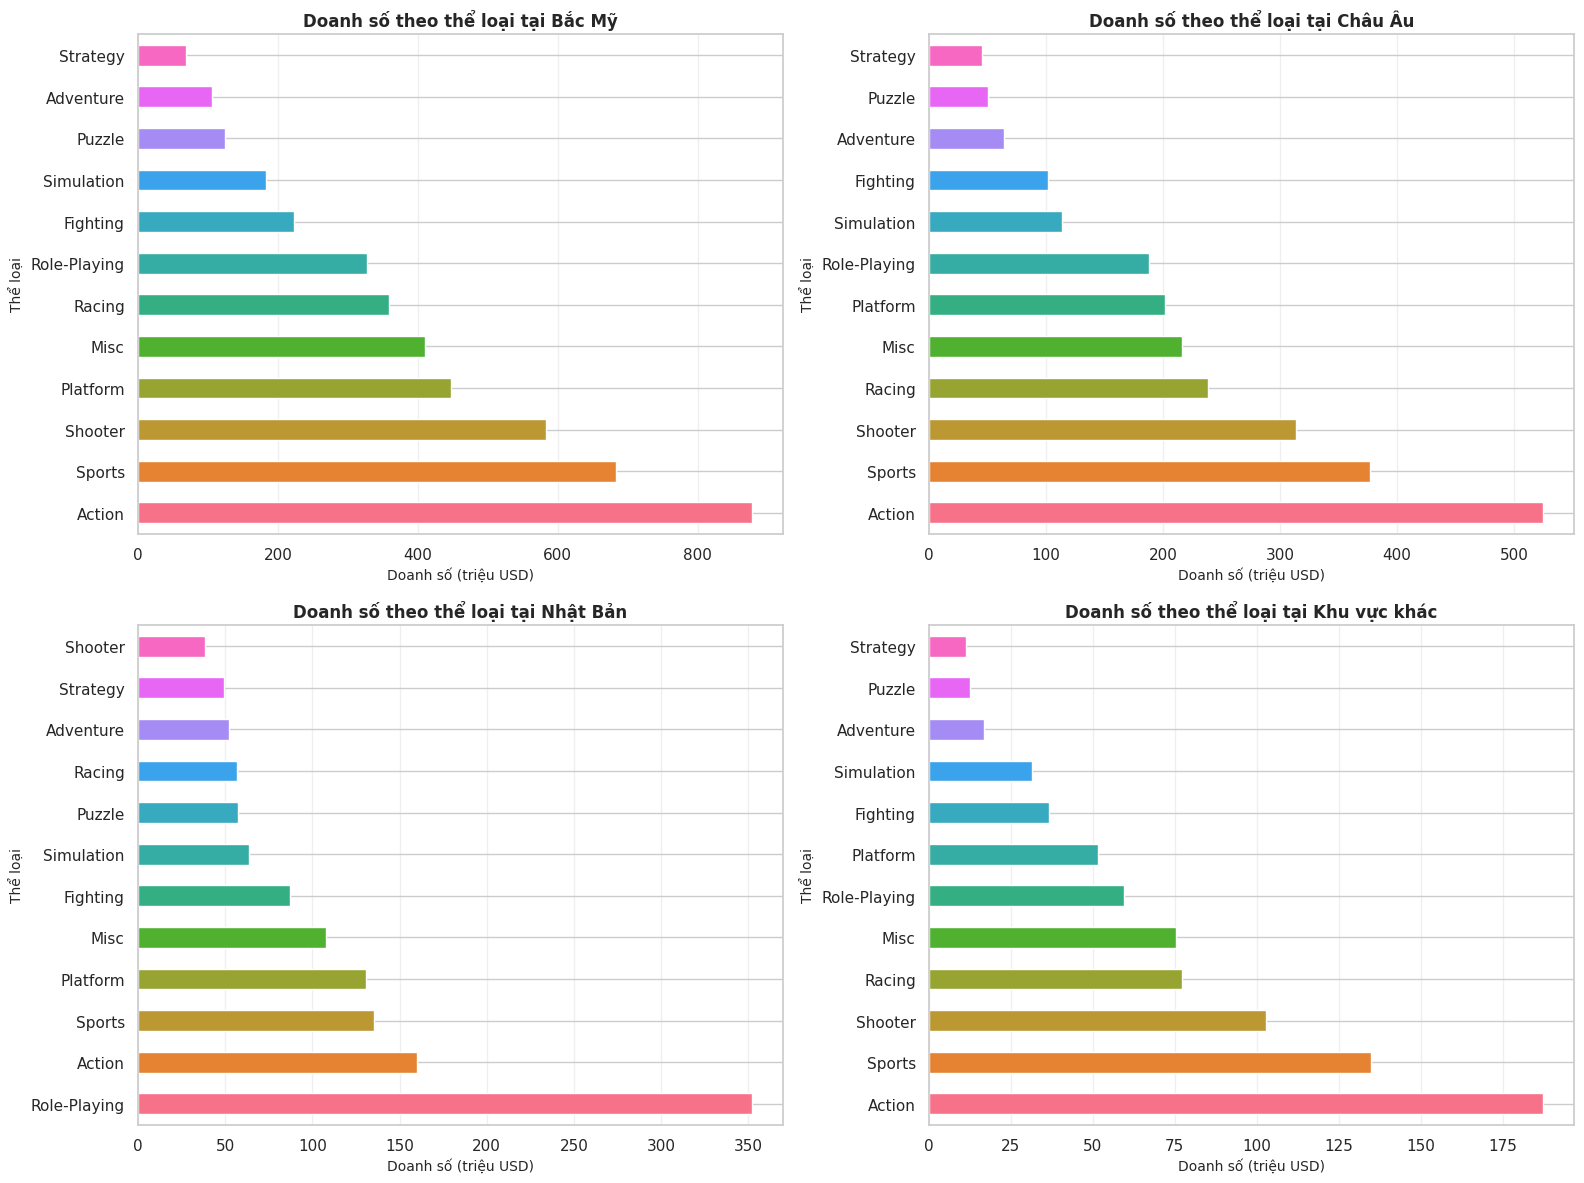

In [19]:
# Phân tích thể loại game được ưa chuộng ở từng khu vực
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
regions = [('NA_Sales', 'Bắc Mỹ'), ('EU_Sales', 'Châu Âu'),
           ('JP_Sales', 'Nhật Bản'), ('Other_Sales', 'Khu vực khác')]

for idx, (sales_col, region_name) in enumerate(regions):
    ax = axes[idx // 2, idx % 2]
    genre_region = df.groupby('Genre')[sales_col].sum().sort_values(ascending=False)
    colors = sns.color_palette('husl', len(genre_region))
    genre_region.plot(kind='barh', ax=ax, color=colors)
    ax.set_title(f'Doanh số theo thể loại tại {region_name}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Doanh số (triệu USD)', fontsize=10)
    ax.set_ylabel('Thể loại', fontsize=10)
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

**Ý nghĩa (Insight văn hóa):**

Có sự khác biệt văn hóa rõ rệt:

*Bắc Mỹ & Châu Âu*: Ưa chuộng Action, Sports, Shooter.

*Nhật Bản:* Là một ngoại lệ thú vị khi dòng game Role-Playing (Nhập vai) thống trị tuyệt đối. Các game bắn súng phương Tây thường khó bán ở Nhật và ngược lại.

***Nhận xét:***

Phân tích doanh số theo khu vực cho thấy sự khác biệt rõ rệt về thị hiếu game giữa các vùng địa lý. Mỗi khu vực có xu hướng ưa chuộng các thể loại game khác nhau, phản ánh văn hóa và thói quen giải trí đặc trưng. Điều này rất quan trọng cho các nhà phát hành khi xây dựng chiến lược marketing và phát hành game cho từng thị trường.

#### 7. Phân tích Top Games

TOP 20 GAME CÓ DOANH SỐ CAO NHẤT TOÀN CẦU
 Rank                                         Name Platform   Year        Genre              Publisher  Global_Sales
    1                                   Wii Sports      Wii 2006.0       Sports               Nintendo         82.74
    2                            Super Mario Bros.      NES 1985.0     Platform               Nintendo         40.24
    3                               Mario Kart Wii      Wii 2008.0       Racing               Nintendo         35.82
    4                            Wii Sports Resort      Wii 2009.0       Sports               Nintendo         33.00
    5                     Pokemon Red/Pokemon Blue       GB 1996.0 Role-Playing               Nintendo         31.37
    6                                       Tetris       GB 1989.0       Puzzle               Nintendo         30.26
    7                        New Super Mario Bros.       DS 2006.0     Platform               Nintendo         30.01
    8                 

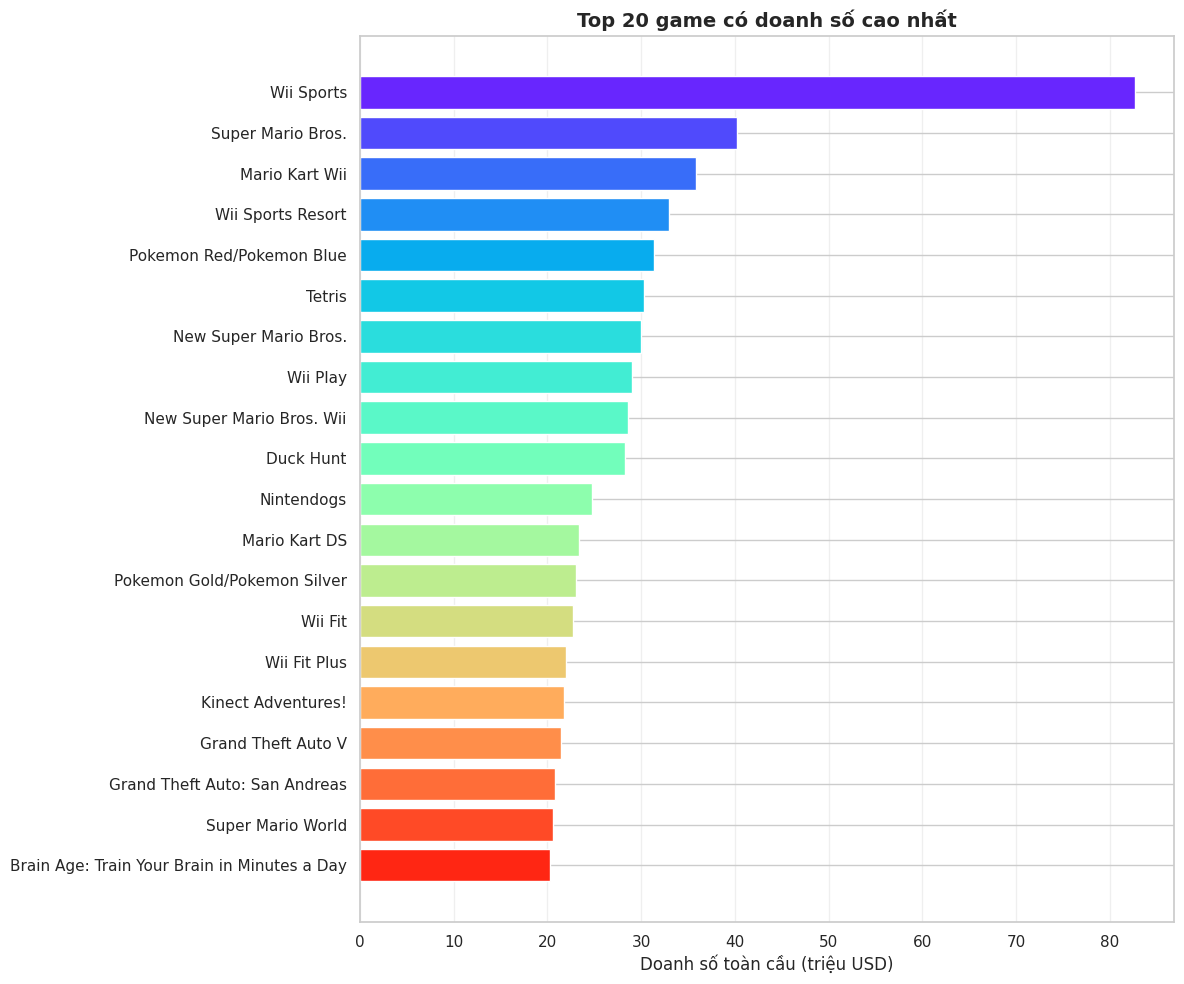

In [20]:
# Top 20 game có doanh số cao nhất toàn cầu
top_games = df.nlargest(20, 'Global_Sales')[['Rank', 'Name', 'Platform', 'Year',
                                               'Genre', 'Publisher', 'Global_Sales']]
print("TOP 20 GAME CÓ DOANH SỐ CAO NHẤT TOÀN CẦU")
print("=" * 100)
print(top_games.to_string(index=False))

# Biểu đồ top 20 games
plt.figure(figsize=(12, 10))
colors = sns.color_palette('rainbow', 20)
top_20 = df.nlargest(20, 'Global_Sales')
plt.barh(range(20), top_20['Global_Sales'].values, color=colors)
plt.yticks(range(20), top_20['Name'].values)
plt.xlabel('Doanh số toàn cầu (triệu USD)', fontsize=12)
plt.title('Top 20 game có doanh số cao nhất', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Ý nghĩa:**

*Wii Sports* đứng đầu bảng (doanh số kỷ lục) phần lớn do được bán kèm (bundle) với máy Wii.

Danh sách Top 20 bị thống trị bởi *Nintendo* (Mario, Pokemon, Wii...) và dòng game Call of Duty / GTA. Điều này cho thấy sức mạnh của các thương hiệu nhượng quyền (Franchise) lâu đời.

In [21]:
# Top 10 games theo từng khu vực
regions_sales = {
    'Bắc Mỹ': 'NA_Sales',
    'Châu Âu': 'EU_Sales',
    'Nhật Bản': 'JP_Sales',
    'Khu vực khác': 'Other_Sales'
}

for region_name, sales_col in regions_sales.items():
    print(f"\nTOP 10 GAME TẠI {region_name.upper()}")
    print("=" * 80)
    top_region = df.nlargest(10, sales_col)[['Name', 'Platform', 'Genre', sales_col]]
    print(top_region.to_string(index=False))
    print()


TOP 10 GAME TẠI BẮC MỸ
                     Name Platform    Genre  NA_Sales
               Wii Sports      Wii   Sports     41.49
        Super Mario Bros.      NES Platform     29.08
                Duck Hunt      NES  Shooter     26.93
                   Tetris       GB   Puzzle     23.20
           Mario Kart Wii      Wii   Racing     15.85
        Wii Sports Resort      Wii   Sports     15.75
       Kinect Adventures!     X360     Misc     14.97
New Super Mario Bros. Wii      Wii Platform     14.59
                 Wii Play      Wii     Misc     14.03
        Super Mario World     SNES Platform     12.78


TOP 10 GAME TẠI CHÂU ÂU
                                        Name Platform        Genre  EU_Sales
                                  Wii Sports      Wii       Sports     29.02
                              Mario Kart Wii      Wii       Racing     12.88
                           Wii Sports Resort      Wii       Sports     11.01
                                  Nintendogs    

***Nhận xét:***

Phân tích các game bán chạy nhất cho thấy những tựa game kinh điển và có sức ảnh hưởng lớn đến ngành công nghiệp game. Đáng chú ý là sự xuất hiện của các franchise lớn và sự khác biệt trong danh sách game bán chạy giữa các khu vực, một lần nữa khẳng định tính đa dạng về thị hiếu người chơi trên toàn cầu.

#### 8. Phân tích tương quan

MA TRẬN TƯƠNG QUAN GIỮA CÁC KHU VỰC
              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
NA_Sales         1.000     0.768     0.450        0.635         0.941
EU_Sales         0.768     1.000     0.436        0.726         0.903
JP_Sales         0.450     0.436     1.000        0.290         0.612
Other_Sales      0.635     0.726     0.290        1.000         0.748
Global_Sales     0.941     0.903     0.612        0.748         1.000


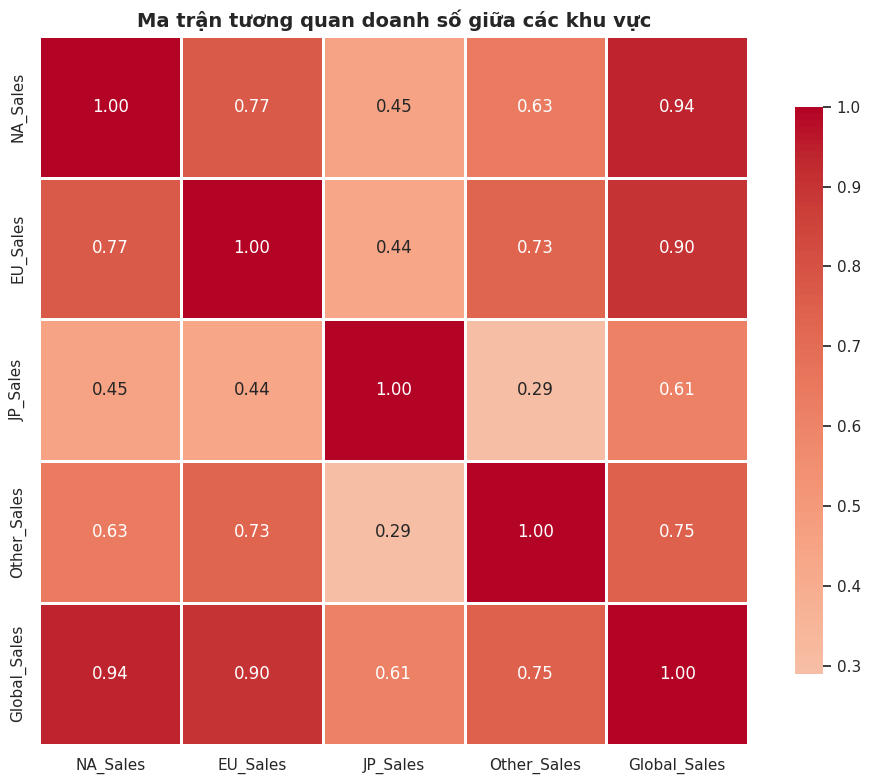

In [22]:
# Ma trận tương quan giữa các khu vực
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
correlation_matrix = df[sales_columns].corr()

print("MA TRẬN TƯƠNG QUAN GIỮA CÁC KHU VỰC")
print("=" * 70)
print(correlation_matrix.round(3))

# Heatmap tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Ma trận tương quan doanh số giữa các khu vực', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Ý nghĩa:**

- Hệ số tương quan giữa NA_Sales và EU_Sales rất cao (> 0.7), cho thấy thị hiếu của người Mỹ và người Âu khá tương đồng.

- Ngược lại, JP_Sales có tương quan thấp với các khu vực còn lại. Một game thành công ở Nhật chưa chắc đã bán được ở Mỹ (và ngược lại). Thị trường Nhật Bản là một "ốc đảo" riêng biệt.

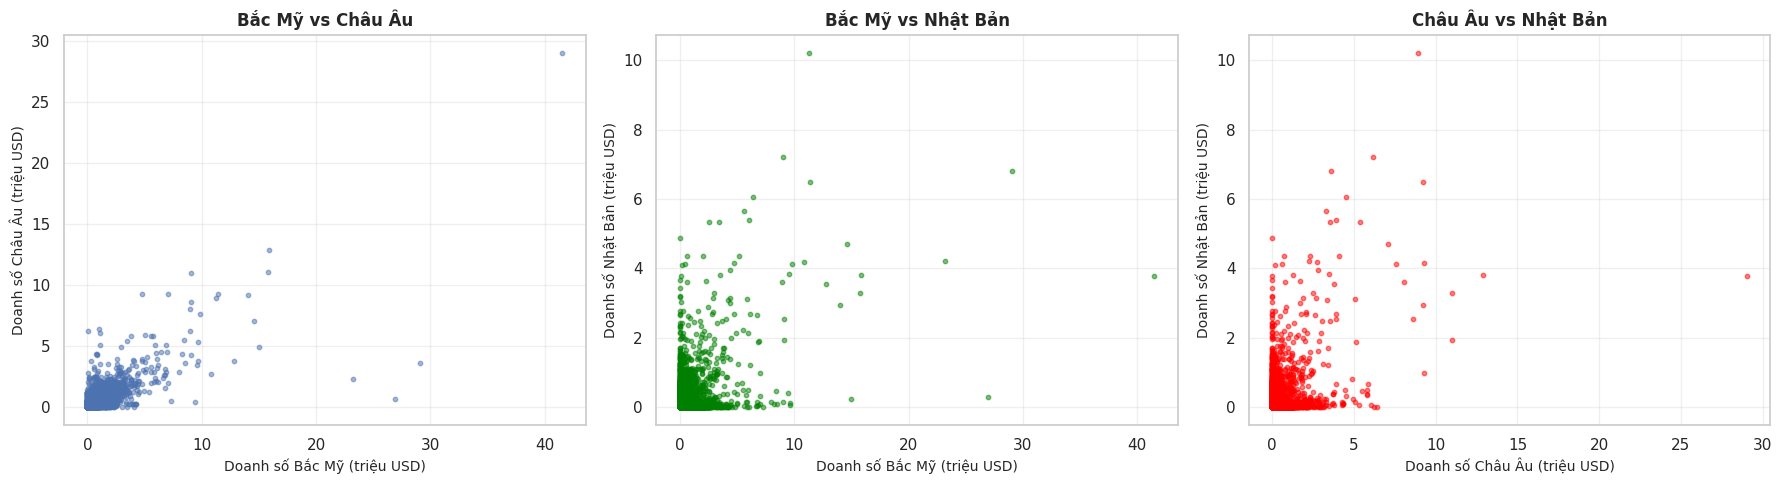

In [23]:
# Scatter plots so sánh các khu vực
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# NA vs EU
axes[0].scatter(df['NA_Sales'], df['EU_Sales'], alpha=0.5, s=10)
axes[0].set_xlabel('Doanh số Bắc Mỹ (triệu USD)', fontsize=10)
axes[0].set_ylabel('Doanh số Châu Âu (triệu USD)', fontsize=10)
axes[0].set_title('Bắc Mỹ vs Châu Âu', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# NA vs JP
axes[1].scatter(df['NA_Sales'], df['JP_Sales'], alpha=0.5, s=10, color='green')
axes[1].set_xlabel('Doanh số Bắc Mỹ (triệu USD)', fontsize=10)
axes[1].set_ylabel('Doanh số Nhật Bản (triệu USD)', fontsize=10)
axes[1].set_title('Bắc Mỹ vs Nhật Bản', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# EU vs JP
axes[2].scatter(df['EU_Sales'], df['JP_Sales'], alpha=0.5, s=10, color='red')
axes[2].set_xlabel('Doanh số Châu Âu (triệu USD)', fontsize=10)
axes[2].set_ylabel('Doanh số Nhật Bản (triệu USD)', fontsize=10)
axes[2].set_title('Châu Âu vs Nhật Bản', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

***Nhận xét:***

Phân tích tương quan cho thấy mối quan hệ giữa doanh số các khu vực. Một số cặp khu vực có tương quan mạnh, cho thấy game bán tốt ở một khu vực thường cũng bán tốt ở khu vực kia. Tuy nhiên, cũng có những cặp khu vực có tương quan yếu hơn, phản ánh sự khác biệt về thị hiếu và văn hóa tiêu dùng game.

#### 9. Phân tích phân phối dữ liệu

THỐNG KÊ MÔ TẢ DOANH SỐ TOÀN CẦU
count    16598.000000
mean         0.537441
std          1.555028
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Global_Sales, dtype: float64

Trung vị: 0.17
Mode (giá trị xuất hiện nhiều nhất): 0.02


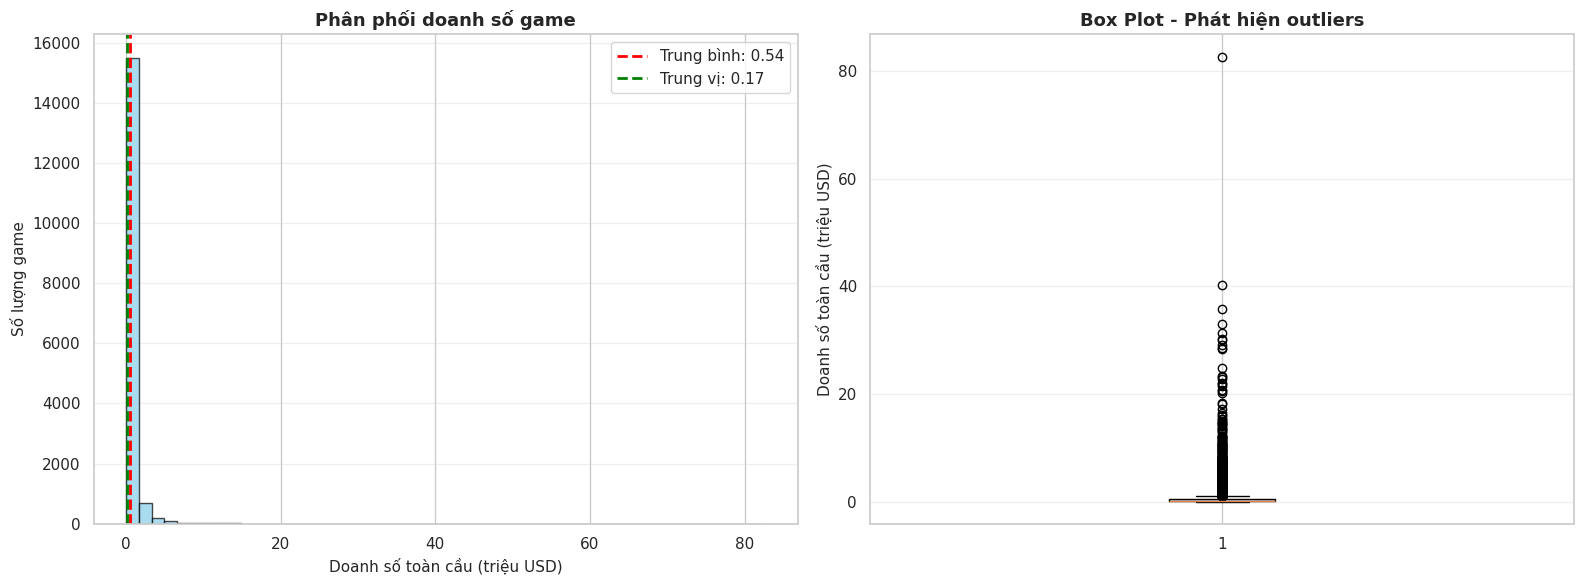

In [24]:
# Thống kê mô tả doanh số
print("THỐNG KÊ MÔ TẢ DOANH SỐ TOÀN CẦU")
print("=" * 50)
print(df['Global_Sales'].describe())
print(f"\nTrung vị: {df['Global_Sales'].median():.2f}")
print(f"Mode (giá trị xuất hiện nhiều nhất): {df['Global_Sales'].mode().values[0]:.2f}")

# Histogram và box plot doanh số
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(df['Global_Sales'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_xlabel('Doanh số toàn cầu (triệu USD)', fontsize=11)
axes[0].set_ylabel('Số lượng game', fontsize=11)
axes[0].set_title('Phân phối doanh số game', fontsize=13, fontweight='bold')
axes[0].axvline(df['Global_Sales'].mean(), color='red', linestyle='--',
                linewidth=2, label=f'Trung bình: {df["Global_Sales"].mean():.2f}')
axes[0].axvline(df['Global_Sales'].median(), color='green', linestyle='--',
                linewidth=2, label=f'Trung vị: {df["Global_Sales"].median():.2f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot(df['Global_Sales'], vert=True)
axes[1].set_ylabel('Doanh số toàn cầu (triệu USD)', fontsize=11)
axes[1].set_title('Box Plot - Phát hiện outliers', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


PHÂN VỊ DOANH SỐ TOÀN CẦU
Percentile 10%: 0.02 triệu USD
Percentile 25%: 0.06 triệu USD
Percentile 50%: 0.17 triệu USD
Percentile 75%: 0.47 triệu USD
Percentile 90%: 1.21 triệu USD
Percentile 95%: 2.04 triệu USD
Percentile 99%: 5.43 triệu USD

PHÂN PHỐI GAME THEO KHOẢNG DOANH SỐ
< 0.1M         :   6181 game (37.24%)
0.1M - 0.5M    :   6470 game (38.98%)
0.5M - 1M      :   1893 game (11.40%)
1M - 5M        :   1849 game (11.14%)
5M - 10M       :    143 game ( 0.86%)
> 10M          :     62 game ( 0.37%)


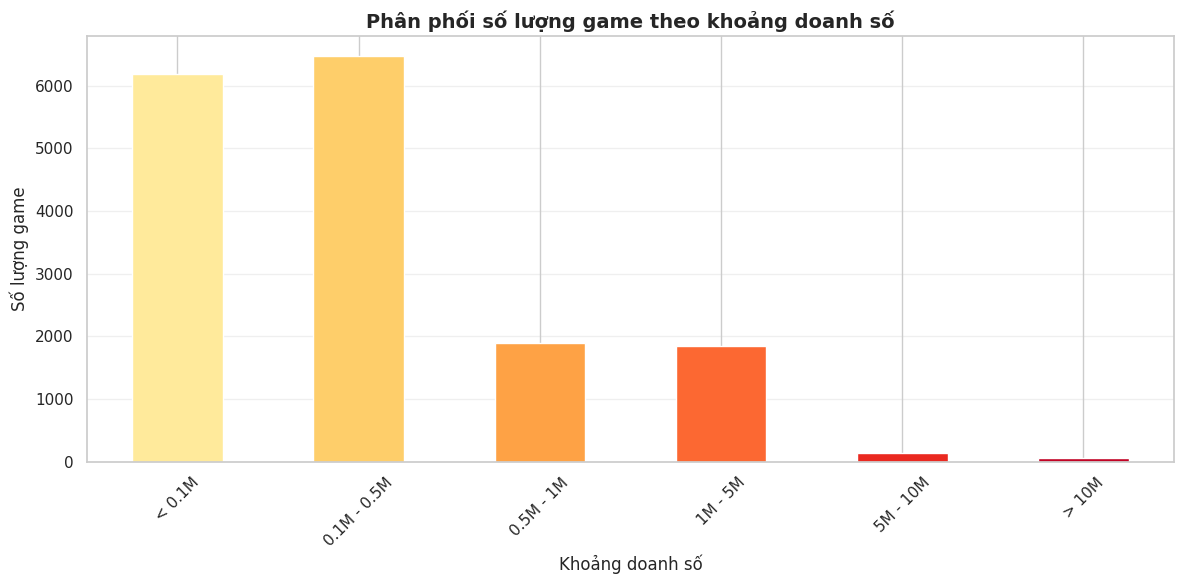

In [25]:
# Phân tích phân vị
percentiles = [10, 25, 50, 75, 90, 95, 99]
print("\nPHÂN VỊ DOANH SỐ TOÀN CẦU")
print("=" * 50)
for p in percentiles:
    value = np.percentile(df['Global_Sales'], p)
    print(f"Percentile {p:2d}%: {value:.2f} triệu USD")

# Đếm số lượng game theo khoảng doanh số
bins = [0, 0.1, 0.5, 1, 5, 10, float('inf')]
labels = ['< 0.1M', '0.1M - 0.5M', '0.5M - 1M', '1M - 5M', '5M - 10M', '> 10M']
df['Sales_Range'] = pd.cut(df['Global_Sales'], bins=bins, labels=labels)

sales_range_counts = df['Sales_Range'].value_counts().sort_index()
print("\nPHÂN PHỐI GAME THEO KHOẢNG DOANH SỐ")
print("=" * 50)
for range_label, count in sales_range_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{range_label:15s}: {count:6d} game ({percentage:5.2f}%)")

# Biểu đồ phân phối theo khoảng doanh số
plt.figure(figsize=(12, 6))
colors = sns.color_palette('YlOrRd', len(sales_range_counts))
sales_range_counts.plot(kind='bar', color=colors)
plt.title('Phân phối số lượng game theo khoảng doanh số', fontsize=14, fontweight='bold')
plt.xlabel('Khoảng doanh số', fontsize=12)
plt.ylabel('Số lượng game', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Ý nghĩa:**

Biểu đồ Boxplot và Histogram cho thấy dữ liệu bị lệch phải (right-skewed) cực nặng.

Đa số các game có doanh số rất thấp (gần 0). Chỉ có một lượng rất nhỏ các điểm ngoại lai (Outliers) phía bên phải đại diện cho các game "Hit" (bán hàng chục triệu bản). Đây là đặc thù của ngành công nghiệp giải trí: "Winner takes all" (Người thắng ăn tất).

***Nhận xét:***

Phân tích phân phối doanh số cho thấy ngành công nghiệp game có sự phân tầng rõ rệt. Đa số game có doanh số thấp, trong khi chỉ một số ít game đạt doanh số rất cao (hiện tượng long tail). Điều này phản ánh tính chất cạnh tranh cao của thị trường, nơi chỉ một số game blockbuster thành công vượt trội, trong khi phần lớn game khác có doanh số khiêm tốn.

#### 10. Phân tích kết hợp các yếu tố

<Figure size 1400x800 with 0 Axes>

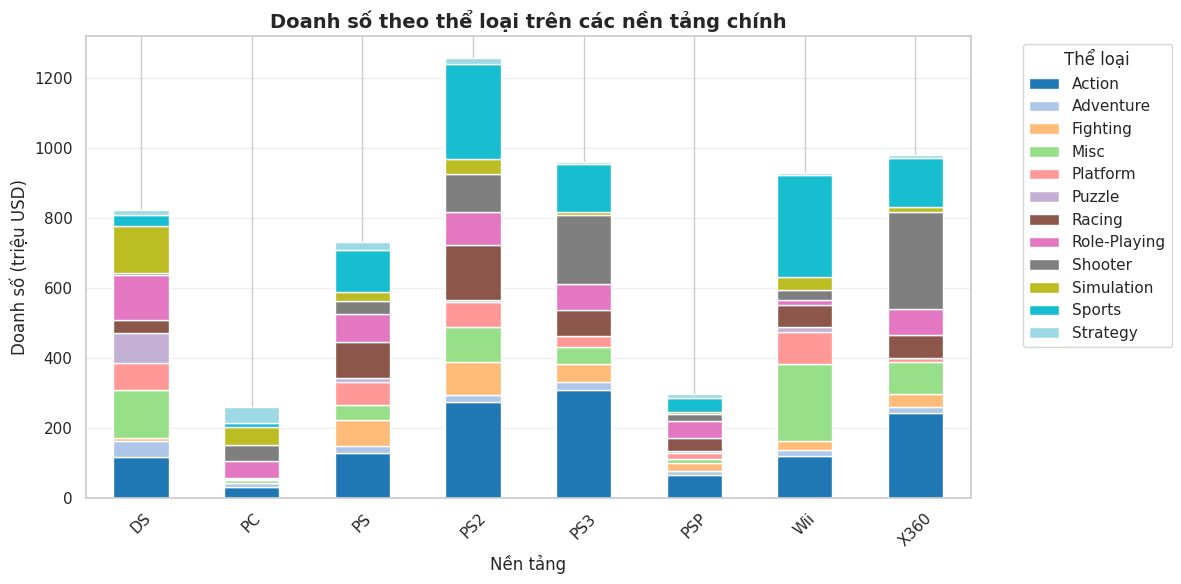

In [26]:
# Top thể loại trên từng platform
top_platforms_list = df['Platform'].value_counts().head(8).index
platform_genre = df[df['Platform'].isin(top_platforms_list)].groupby(['Platform', 'Genre'])['Global_Sales'].sum().unstack()

plt.figure(figsize=(14, 8))
platform_genre.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Doanh số theo thể loại trên các nền tảng chính', fontsize=14, fontweight='bold')
plt.xlabel('Nền tảng', fontsize=12)
plt.ylabel('Doanh số (triệu USD)', fontsize=12)
plt.legend(title='Thể loại', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Ý nghĩa:

Mỗi hệ máy có "DNA" riêng: Xbox360 là thánh địa của game Shooter, trong khi DS/Wii là thiên đường của game Misc/Platform. Điều này giúp định hướng cho nhà phát triển chọn nền tảng phù hợp với thể loại game mình làm.

<Figure size 1400x700 with 0 Axes>

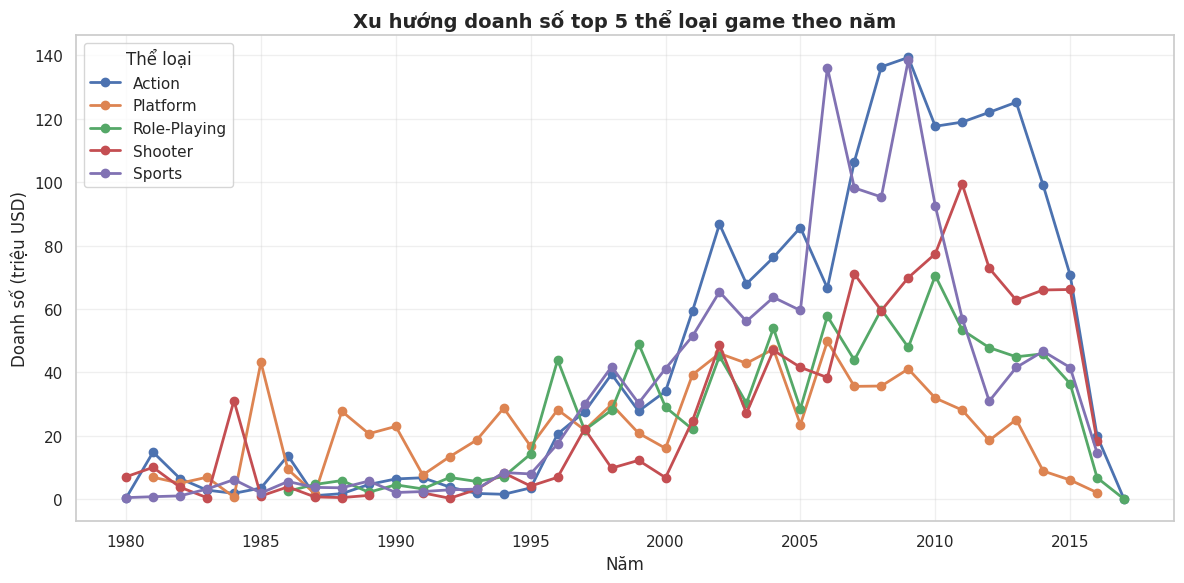

In [27]:
# Xu hướng thể loại game theo thời gian
if len(df_year) > 0:
    # Lấy top 5 thể loại có doanh số cao nhất
    top_genres = df.groupby('Genre')['Global_Sales'].sum().nlargest(5).index

    genre_year = df_year[df_year['Genre'].isin(top_genres)].groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack()

    plt.figure(figsize=(14, 7))
    genre_year.plot(kind='line', marker='o', linewidth=2)
    plt.title('Xu hướng doanh số top 5 thể loại game theo năm', fontsize=14, fontweight='bold')
    plt.xlabel('Năm', fontsize=12)
    plt.ylabel('Doanh số (triệu USD)', fontsize=12)
    plt.legend(title='Thể loại', loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

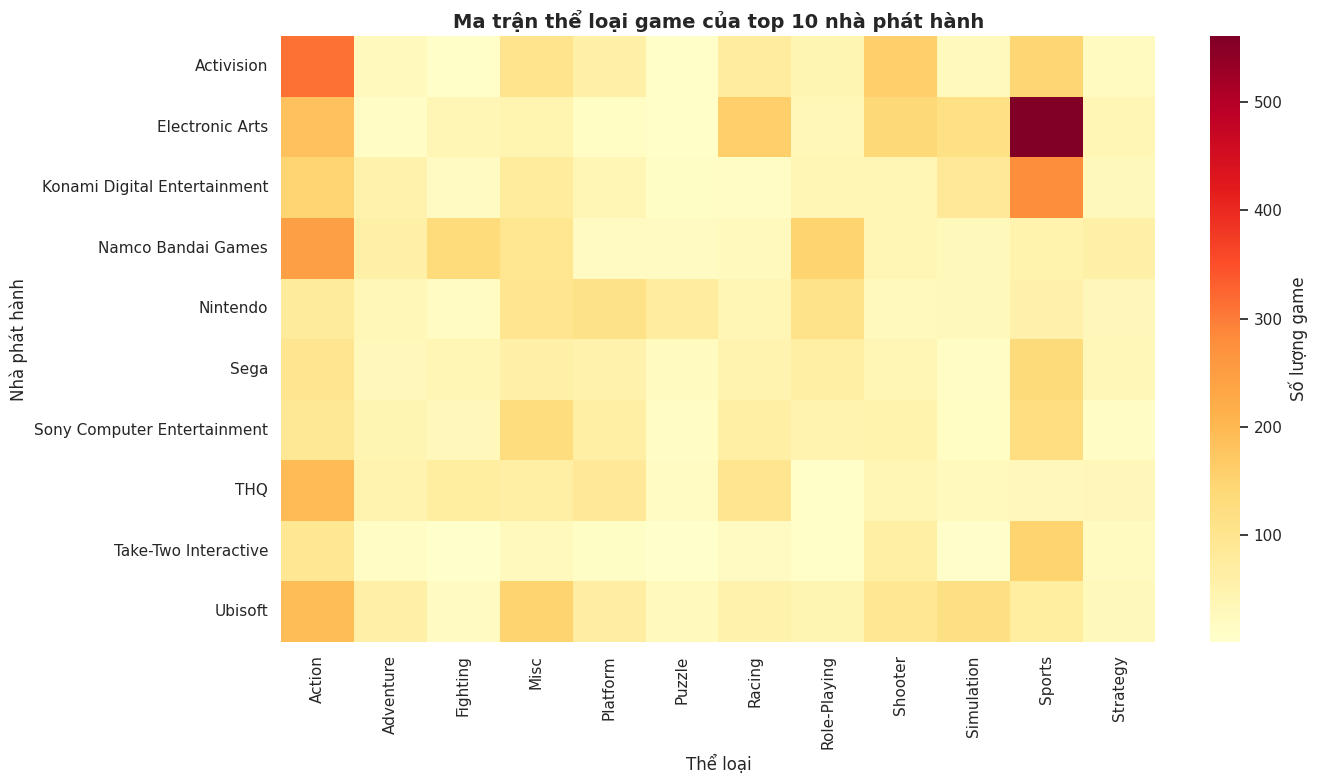

In [28]:
# Chuyên môn hóa thể loại của top publishers
top_pubs = df['Publisher'].value_counts().head(10).index

pub_genre = df[df['Publisher'].isin(top_pubs)].groupby(['Publisher', 'Genre']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(pub_genre, cmap='YlOrRd', annot=False, fmt='d', cbar_kws={'label': 'Số lượng game'})
plt.title('Ma trận thể loại game của top 10 nhà phát hành', fontsize=14, fontweight='bold')
plt.xlabel('Thể loại', fontsize=12)
plt.ylabel('Nhà phát hành', fontsize=12)
plt.tight_layout()
plt.show()

**Ý nghĩa:**

Sự chuyên môn hóa rất rõ ràng:

- Electronic Arts: Thống trị mảng Sports (FIFA, Madden).

- Activision: Tập trung mạnh vào Shooter (Call of Duty).

- Nintendo: Đa dạng nhưng mạnh nhất ở Platform và Role-Playing.

***Nhận xét:***

Phân tích kết hợp các yếu tố cho thấy những insight sâu sắc về mối quan hệ giữa platform, thể loại và nhà phát hành. Mỗi platform có xu hướng thành công với những thể loại game khác nhau, và các nhà phát hành lớn thường có chiến lược chuyên môn hóa vào một số thể loại nhất định. Xu hướng thể loại game cũng thay đổi theo thời gian, phản ánh sự tiến hóa của công nghệ và thị hiếu người chơi.

## <a id="tổng-kết-phần-khám-phá-dữ-liệu"></a>Tổng kết phần Khám phá Dữ liệu

### <a id="những-phát-hiện-chính"></a>Những phát hiện chính

Qua quá trình phân tích khám phá dữ liệu về doanh số game toàn cầu, chúng ta đã có những phát hiện quan trọng:

**1. Về nền tảng (Platform):**
- Dataset chứa dữ liệu từ nhiều nền tảng khác nhau, từ console thế hệ cũ đến hiện đại
- Một số nền tảng thống trị về cả số lượng game lẫn doanh số
- Sự chuyển đổi giữa các thế hệ console tạo ra những thay đổi lớn trong thị trường

**2. Về thể loại game (Genre):**
- Các thể loại Action và Sports chiếm ưu thế về số lượng và doanh số
- Doanh số trung bình mỗi game khác nhau đáng kể giữa các thể loại
- Thị hiếu về thể loại game thay đổi theo thời gian và khu vực địa lý

**3. Về xu hướng thời gian:**
- Ngành công nghiệp game trải qua nhiều giai đoạn tăng trưởng và suy giảm
- Các thập kỷ khác nhau có đặc điểm riêng về số lượng và doanh số game
- Có những năm đột phá với doanh số đặc biệt cao

**4. Về nhà phát hành (Publisher):**
- Thị trường tập trung vào một số nhà phát hành lớn
- Các publisher hàng đầu có chiến lược và thế mạnh riêng
- Sự chuyên môn hóa vào các thể loại game cụ thể

**5. Về phân bố địa lý:**
- Bắc Mỹ, Châu Âu, và Nhật Bản là 3 thị trường chính
- Mỗi khu vực có thị hiếu và xu hướng tiêu dùng game riêng
- Tương quan doanh số giữa các khu vực khác nhau tùy game

**6. Về phân phối doanh số:**
- Phần lớn game có doanh số thấp
- Chỉ một số ít game blockbuster đạt doanh số rất cao
- Hiện tượng "long tail" rõ rệt trong ngành công nghiệp game

## <a id="đánh-giá-chất-lượng-dữ-liệu"></a>Đánh giá chất lượng dữ liệu

**Điểm mạnh của dataset:**
- Số lượng record lớn (hơn 16,000 games)
- Bao phủ thời gian dài (từ những năm 1980 đến 2020)
- Đa dạng về platform, genre, publisher
- Có phân chia doanh số theo khu vực địa lý

**Hạn chế của dataset:**
- Có một số giá trị thiếu trong cột Year
- Dữ liệu từ VGChartz có thể không hoàn toàn chính xác 100%
- Thiếu một số thông tin quan trọng như ngân sách phát triển, chi phí marketing
- Không có thông tin về doanh số digital (chỉ tập trung vào bản vật lý)

**Xử lý dữ liệu đã thực hiện:**
- Kiểm tra và báo cáo dữ liệu thiếu
- Loại bỏ dữ liệu thiếu khi cần thiết cho các phân tích cụ thể
- Phát hiện và xử lý các outliers
- Tạo các biến phụ trợ để phân tích (Decade, Sales_Range)

***Ý nghĩa của phân tích:***

Phân tích khám phá dữ liệu này cung cấp cái nhìn tổng quan và sâu sắc về ngành công nghiệp game toàn cầu. Những insight từ phân tích có thể giúp:

- **Đối với game developers:** Hiểu rõ thị trường để đưa ra quyết định về platform, genre, và target audience
- **Đối với publishers:** Xác định chiến lược phát hành và marketing phù hợp cho từng khu vực
- **Đối với investors:** Đánh giá tiềm năng và rủi ro khi đầu tư vào các dự án game
- **Đối với researchers:** Nền tảng để nghiên cứu sâu hơn về hành vi người tiêu dùng và xu hướng thị trường

Dataset này là một nguồn tài nguyên quý giá để hiểu về sự tiến hóa của ngành công nghiệp game qua nhiều thập kỷ, và có thể được sử dụng làm cơ sở cho nhiều nghiên cứu và phân tích chuyên sâu hơn trong tương lai.